### **Análisis del Dataset NASA Asteroids**

# **1. Estructura General del Dataset**

  Total de filas: 4,687 registros de asteroides

  Total de columnas: 40 variables que describen características de los asteroides
  
  Variable objetivo: "Hazardous" (booleano) - Indica si el asteroide es potencialmente peligroso

In [ ]:
# Importar librerías necesarias
import pandas as pd #data processing
import numpy as np ##linear algebra
import requests

import csv
from pandas import DataFrame ## reading data as tables
import matplotlib.pyplot as plt
import seaborn as sns

import IPython.display as display
from IPython.display import HTML


## Data cleaning

In [ ]:

# Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/NASA Asteroids Classification/nasa.csv')

# Información básica sobre el dataset
##Are inappropiate values? (after pront I can seethere are no inappropiate values)
print("\nInformación básica del dataset:")
df.info()

# Verificar valores nulos (after the observation we can see that there is no missing data or null values in the collected data)
print("\nValores nulos por columna:")
df.isnull().sum().head()





Información básica del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach    

,0
Neo Reference ID,0
Name,0
Absolute Magnitude,0
Est Dia in KM(min),0
Est Dia in KM(max),0


## Data Distribution

In [ ]:
df.describe() ##description of data

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [ ]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)        # Ancho de la pantalla
pd.set_option('display.max_rows', 20)       # Limitar a 20 filas para mejor visualización

# Mostrar las primeras filas con todas las columnas
display.display(HTML(df.head(10).to_html()))


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
5,3671135,3671135,19.6,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,2344.363926,1995-01-15,790156800000,10.808844,38911.838251,24178.303051,0.392785,152.793274,58759768.0,36511628.0,Earth,40,2017-06-04 06:16:52,1,0.272213,4.724,2458000.5,0.563441,1.323532,17.927751,178.971951,556.160556,0.577800,198.145969,2.069265,2.458009e+06,354.237368,0.647295,J2000,False
6,2495323,2495323,19.6,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,2344.363926,1995-01-15,790156800000,10.808842,38911.829716,24178.297748,0.392783,152.792664,58759532.0,36511480.0,Earth,43,2017-06-28 06:19:25,1,0.272213,4.724,2458000.5,0.563441,1.323532,17.927748,178.971953,556.160544,0.577800,198.145960,2.069265,2.458009e+06,354.237396,0.647295,J2000,False
7,2153315,2153315,19.2,0.384198,0.859093,384.197891,859.092601,0.238729,0.533815,1260.491809,2818.545370,1995-01-22,790761600000,24.421884,87918.782382,54629.312308,0.129179,50.250694,19324928.0,12007954.0,Earth,22,2017-04-06 09:27:05,0,0.098758,4.921,2458000.5,0.449763,1.237475,34.695127,112.562984,502.808758,0.680905,288.374651,1.794045,2.458242e+06,186.776932,0.715978,J2000,False
8,2162463,2162463,17.8,0.732074,1.636967,732.073989,1636.967205,0.454890,1.017164,2401.817627,5370.627484,1995-01-22,790761600000,17.373784,62545.621813,38863.417065,0.358283,139.372055,53598364.0,33304478.0,Ea

# **2.- Multiclass Classification Problems**


##1.Clasificación Multiclase de Asteroides NASA
    Internet sobre cada caracteristica orgitales:
    Clasifica asteroides en 7 categorías según sus características orbitales:
    - *Earth-Crosser:* Cruzan la órbita de la Tierra con excentricidad moderada
    - *Earth-Crosser-HighEcc:* Cruzan la órbita de la Tierra con alta excentricidad
    - *Mars-Crosser:* Entre la Tierra y Marte con excentricidad moderada
    - *Mars-Crosser-HighEcc:* Entre la Tierra y Marte con alta excentricidad
    - *MainBelt-Low: *Cinturón principal con baja inclinación
    - *MainBelt-High:* Cinturón principal con alta inclinación
    - *Outer-Solar:* Más allá del cinturón principal
    


Primeras filas con la nueva variable objetivo 'OrbitalType':
   Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  Est Dia in Feet(max) Close Approach Date  Epoch Date Close Approach  Relative Velocity km per sec  Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles) Orbiting Body  Orbit ID Orbit Determination Date  Orbit Uncertainity  Minimum Orbit Intersection  Jupiter Tisserand Invariant  Epoch Osculation  Eccentricity  Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  Perihelion Distance  Perihelion Arg  Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion Equinox  Hazardous           OrbitalType
0           3703080  3703080                21.6            0.127220            0.284472         127.219879         284.472297               0.079051 

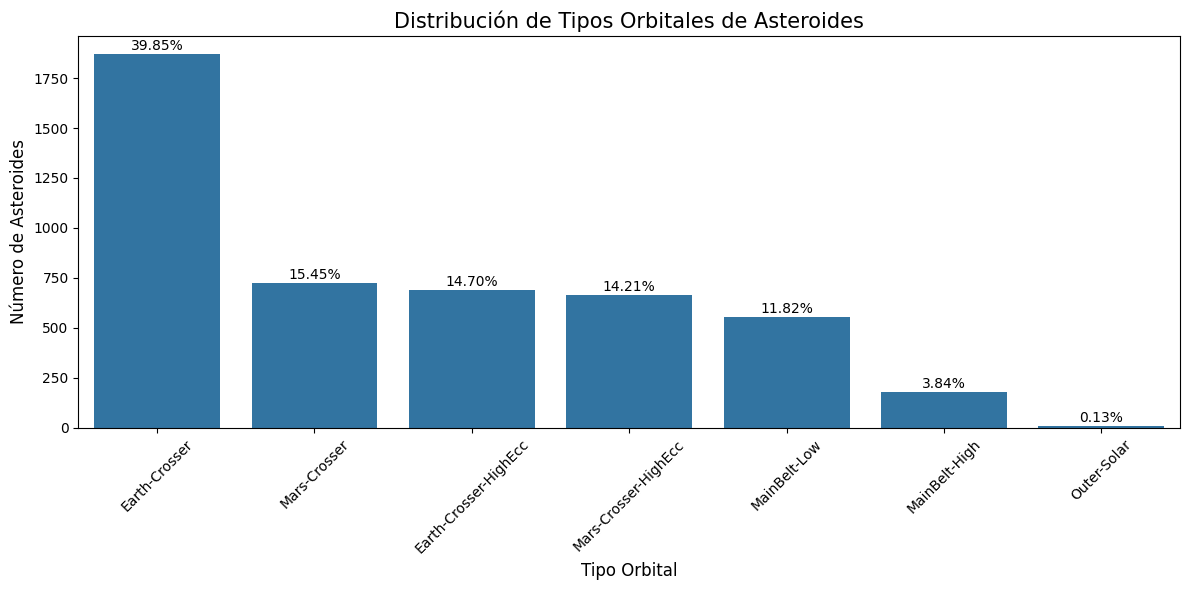

In [ ]:

# variable objetivo multiclase (OrbitalType) basada en características orbitales
def classify_asteroid(row):

    semi_major_axis = row['Semi Major Axis']
    eccentricity = row['Eccentricity']
    inclination = row['Inclination']

    # Clasificación por tipo orbital
    if semi_major_axis < 1.3:  # Aten y Apollo (cruzan la órbita terrestre)
        if eccentricity >= 0.4:
            return "Earth-Crosser-HighEcc"
        else:
            return "Earth-Crosser"
    elif semi_major_axis >= 1.3 and semi_major_axis < 2:  # Entre Tierra y Marte
        if eccentricity >= 0.4:
            return "Mars-Crosser-HighEcc"
        else:
            return "Mars-Crosser"
    elif semi_major_axis >= 2 and semi_major_axis < 3.3:  # Cinturón principal
        if inclination < 15:
            return "MainBelt-Low"
        else:
            return "MainBelt-High"
    else:  # Más allá del cinturón principal
        return "Outer-Solar"

# Aplicar la función de clasificación a cada asteroide
df['OrbitalType'] = df.apply(classify_asteroid, axis=1)

# Mostrar las primeras filas del dataset con la nueva columna
print("\nPrimeras filas con la nueva variable objetivo 'OrbitalType':")
print(df.head())

# Analizar la distribución de la nueva variable objetivo
class_counts = df['OrbitalType'].value_counts()
class_percentages = df['OrbitalType'].value_counts(normalize=True) * 100

# Mostrar la distribución de clases
distribution_df = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages
})

print("\nDistribución de clases de la variable objetivo 'OrbitalType':")
print(distribution_df)

# Visualizar la distribución de clases
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribución de Tipos Orbitales de Asteroides', fontsize=15)
plt.xlabel('Tipo Orbital', fontsize=12)
plt.ylabel('Número de Asteroides', fontsize=12)
plt.xticks(rotation=45)

# Añadir etiquetas de porcentaje encima de cada barra
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,
        height + 20,
        f'{class_percentages.iloc[i]:.2f}%',
        ha="center"
    )

plt.tight_layout()
plt.show()




Estadísticas por tipo orbital:
                       Absolute Magnitude  Est Dia in KM(max)  Eccentricity  Inclination
OrbitalType                                                                             
Earth-Crosser                     23.4612              0.2650        0.2311      12.5204
Earth-Crosser-HighEcc             21.1391              0.6023        0.5169      15.6348
MainBelt-High                     19.5246              1.0106        0.6010      25.9614
MainBelt-Low                      21.9372              0.4791        0.5799       6.5285
Mars-Crosser                      22.1321              0.4709        0.2925      14.9573
Mars-Crosser-HighEcc              21.2656              0.6659        0.5406      13.9441
Outer-Solar                       20.8333              0.4347        0.6826      19.5059


<ipython-input-6-724d9bfe06e5>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
<ipython-input-6-724d9bfe06e5>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
<ipython-input-6-724d9bfe06e5>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
<ipython-input-6-724d9bfe06e5>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)


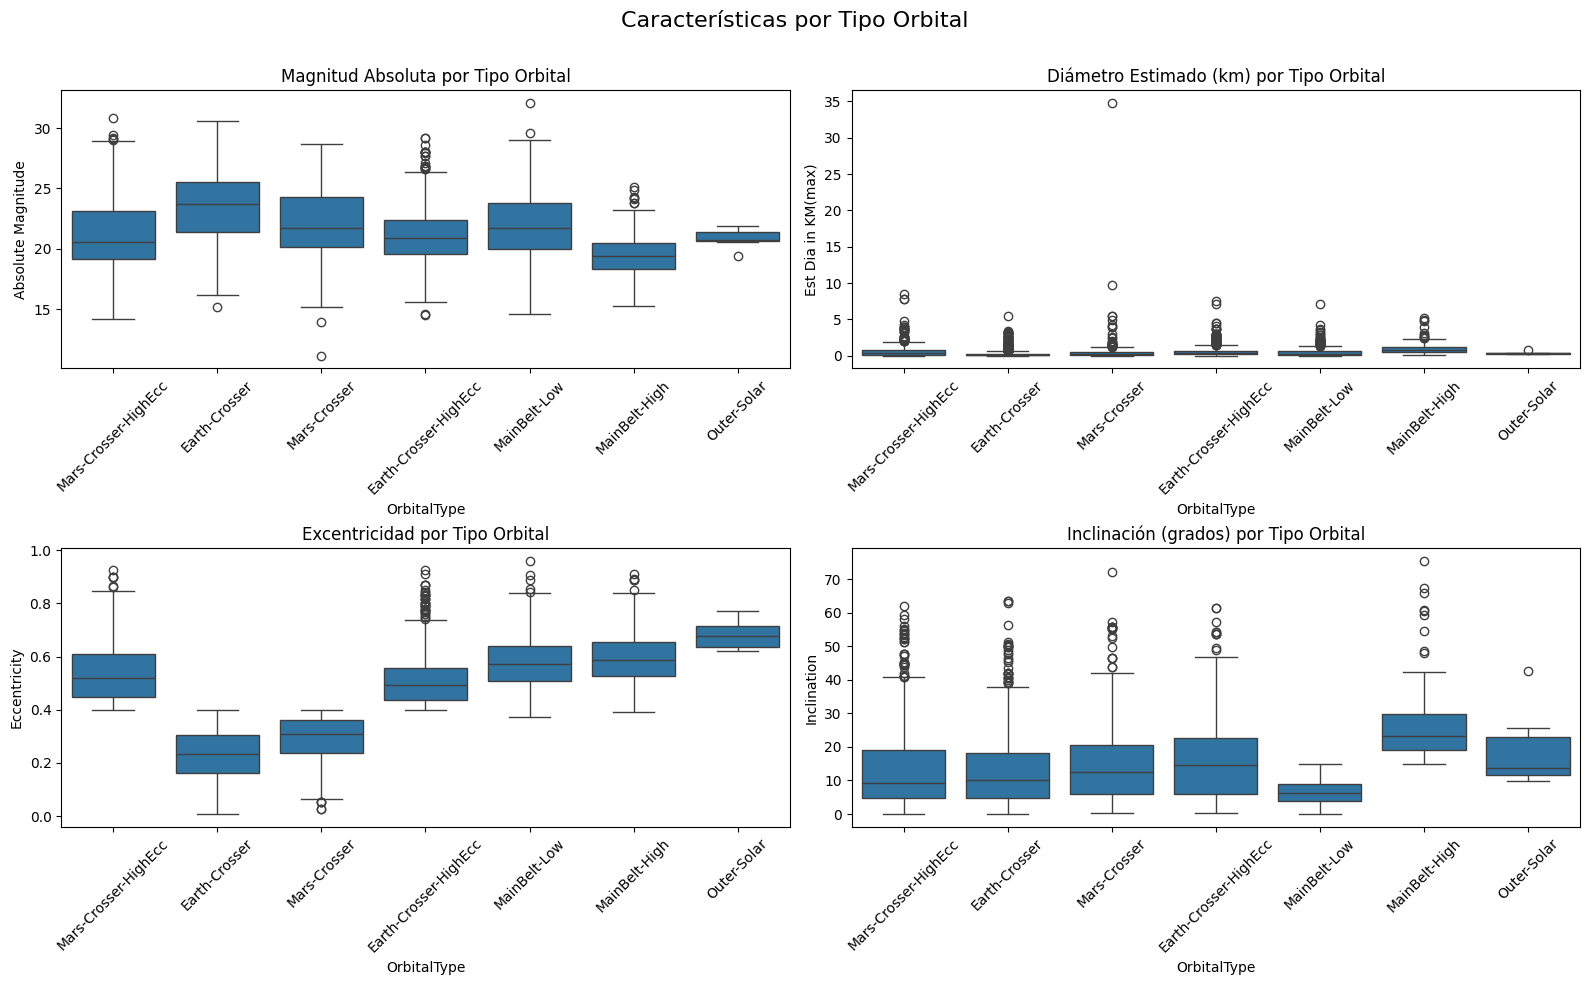


Dataset con variable objetivo guardado como 'nasa_with_orbital_types.csv'

Ejemplos de asteroides por clase:

Clase: Earth-Crosser
   Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  Est Dia in Feet(max) Close Approach Date  Epoch Date Close Approach  Relative Velocity km per sec  Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles) Orbiting Body  Orbit ID Orbit Determination Date  Orbit Uncertainity  Minimum Orbit Intersection  Jupiter Tisserand Invariant  Epoch Osculation  Eccentricity  Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  Perihelion Distance  Perihelion Arg  Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion Equinox  Hazardous    OrbitalType
1           3723955  3723955                21.3            0.146068            0.32661

In [ ]:
# Análisis de características por clase
print("\nEstadísticas por tipo orbital:")
class_stats = df.groupby('OrbitalType').agg({
    'Absolute Magnitude': 'mean',
    'Est Dia in KM(max)': 'mean',
    'Eccentricity': 'mean',
    'Inclination': 'mean'
}).round(4)

print(class_stats)

# Visualizar las características por clase
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Características por Tipo Orbital', fontsize=16)

# Diagrama de caja para Magnitud Absoluta
sns.boxplot(x='OrbitalType', y='Absolute Magnitude', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Magnitud Absoluta por Tipo Orbital')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Diagrama de caja para Diámetro
sns.boxplot(x='OrbitalType', y='Est Dia in KM(max)', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Diámetro Estimado (km) por Tipo Orbital')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Diagrama de caja para Excentricidad
sns.boxplot(x='OrbitalType', y='Eccentricity', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Excentricidad por Tipo Orbital')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Diagrama de caja para Inclinación
sns.boxplot(x='OrbitalType', y='Inclination', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Inclinación (grados) por Tipo Orbital')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Guardar el dataset con la nueva variable objetivo
df.to_csv('/content/nasa_with_orbital_types.csv', index=False)
print("\nDataset con variable objetivo guardado como 'nasa_with_orbital_types.csv'")

# Visualizar algunos ejemplos de cada clase
print("\nEjemplos de asteroides por clase:")
for class_name in class_counts.index:
    print(f"\nClase: {class_name}")
    print(df[df['OrbitalType'] == class_name].head(2))

## 2. Clasificación por Nivel de Riesgo
Esta clasificación combinaría múltiples factores para crear una evaluación integral del riesgo potencial:

    Clasifica asteroides en 6 categorías según múltiples factores de riesgo:
    - Negligible: Muy pequeño y/o distante
    - Very Low: Pequeño y distante
    - Low: Tamaño moderado o acercamiento moderado
    - Moderate: Combinación de factores de riesgo intermedios
    - High: Grande y cercano
    - Extreme: Combinación de factores de alto riesgo


In [ ]:
def classify_by_risk(row):
    diameter = row['Est Dia in KM(max)']
    miss_distance = row['Miss Dist.(Astronomical)']
    velocity = row['Relative Velocity km per sec']

    # Factor de tamaño (0-4)
    if diameter < 0.05:
        size_factor = 0
    elif diameter < 0.2:
        size_factor = 1
    elif diameter < 1.0:
        size_factor = 2
    elif diameter < 5.0:
        size_factor = 3
    else:
        size_factor = 4

    # Factor de distancia (0-4)
    if miss_distance > 0.3:
        distance_factor = 0
    elif miss_distance > 0.1:
        distance_factor = 1
    elif miss_distance > 0.05:
        distance_factor = 2
    elif miss_distance > 0.01:
        distance_factor = 3
    else:
        distance_factor = 4

    # Factor de velocidad (0-2)
    if velocity < 10:
        velocity_factor = 0
    elif velocity < 20:
        velocity_factor = 1
    else:
        velocity_factor = 2

    # Puntuación de riesgo combinada
    risk_score = size_factor + distance_factor + velocity_factor

    # Clasificación por puntuación
    if risk_score <= 2:
        return "Negligible"
    elif risk_score <= 4:
        return "Very Low"
    elif risk_score <= 6:
        return "Low"
    elif risk_score <= 8:
        return "Moderate"
    elif risk_score <= 10:
        return "High"
    else:
        return "Extreme"

# Aplicar la clasificación
df['RiskClass'] = df.apply(classify_by_risk, axis=1)

In [ ]:
# Analizar la distribución de
class_counts = df['RiskClass'].value_counts()
class_percentages = df['RiskClass'].value_counts(normalize=True) * 100

# Mostrar la distribución de clases
distribution_df = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages
})

print("\nDistribución de clases de la variable objetivo 'RiskClass':")
print(distribution_df)


Distribución de clases de la variable objetivo 'RiskClass':
            Count  Percentage
RiskClass                    
Very Low     2556   54.533817
Negligible   1358   28.973757
Low           751   16.023042
Moderate       22    0.469383


## 3. Clasificación por Potencial Científico
Esta clasificación se centraría en el interés científico potencial del asteroide:

    Clasifica asteroides por su potencial interés científico:
    - Common: Asteroide típico
    - Eccentric: Órbita inusual
    - FastRotator: Rotación rápida inferida
    - Pristine: Potencialmente prístino
    - Metallic: Potencialmente metálico
    - Peculiar: Características poco comunes


In [ ]:
def classify_by_scientific_potential(row):
    # Define characteristics that make asteroids scientifically interesting
    has_unusual_orbit = (row['Eccentricity'] > 0.7 or row['Inclination'] > 40)
    has_unusual_composition = (row['Absolute Magnitude'] < 16 or row['Est Dia in KM(max)'] > 5)
    potentially_pristine = (row['Aphelion Dist'] > 3.5 and row['Perihelion Distance'] > 2.5)
    potentially_metallic = (row['Absolute Magnitude'] > 15 and row['Absolute Magnitude'] < 18)
    fast_rotation = (row['Mean Motion'] > 0.9)

    # Classify based on characteristics
    if potentially_pristine:
        return "Pristine"
    elif potentially_metallic:
        return "Metallic"
    elif fast_rotation:
        return "FastRotator"
    elif has_unusual_orbit:
        return "Eccentric"
    elif has_unusual_composition:
        return "Peculiar"
    else:
        return "Common"

# Apply classification
df['ScientificPotential'] = df.apply(classify_by_scientific_potential, axis=1)

In [ ]:
# Analizar la distribución de
class_counts = df['ScientificPotential'].value_counts()
class_percentages = df['ScientificPotential'].value_counts(normalize=True) * 100

# Mostrar la distribución de clases
distribution_df = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages
})

print("\nDistribución de clases de la variable objetivo 'ScientificPotential':")
print(distribution_df)


Distribución de clases de la variable objetivo 'ScientificPotential':
                     Count  Percentage
ScientificPotential                   
Common                2693   57.456795
FastRotator           1517   32.366119
Eccentric              256    5.461916
Metallic               216    4.608492
Peculiar                 5    0.106678


# **3 Data Exploration and Preprocessing**


# - Feature Elimination Strategy Implementation


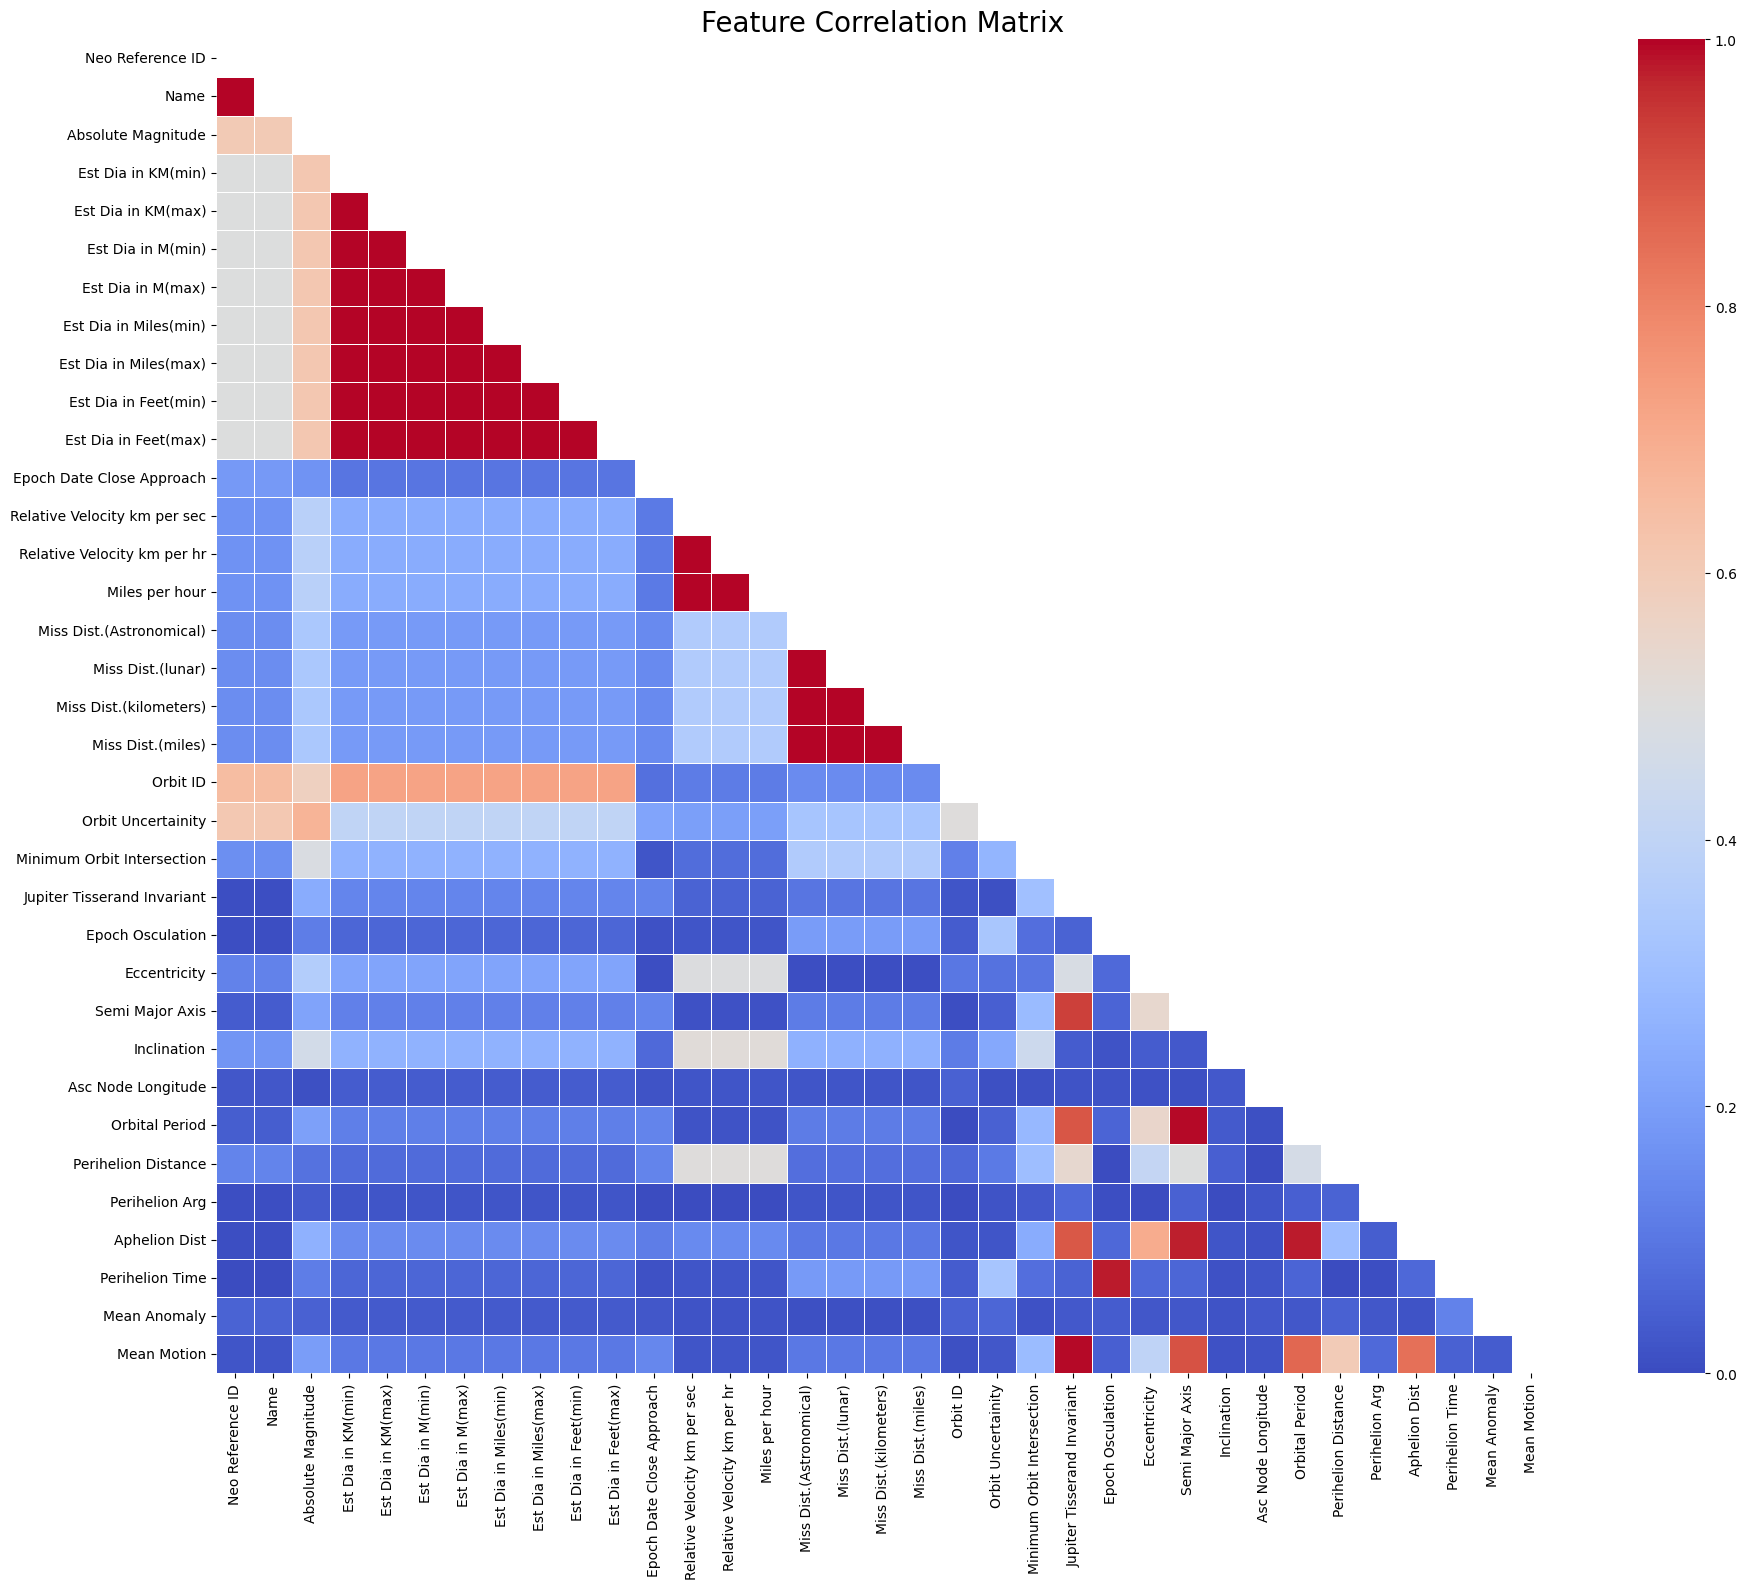

Highly correlated feature pairs:
               Feature 1                    Feature 2  Correlation
16  Est Dia in Feet(min)           Est Dia in KM(min)     1.000000
6      Est Dia in M(max)            Est Dia in M(min)     1.000000
20  Est Dia in Feet(min)        Est Dia in Miles(min)     1.000000
22  Est Dia in Feet(max)           Est Dia in KM(min)     1.000000
1     Est Dia in KM(max)           Est Dia in KM(min)     1.000000
..                   ...                          ...          ...
46           Mean Motion              Semi Major Axis     0.901396
39        Orbital Period  Jupiter Tisserand Invariant     0.893517
41         Aphelion Dist  Jupiter Tisserand Invariant     0.887879
47           Mean Motion               Orbital Period     0.859462
48           Mean Motion                Aphelion Dist     0.840166

[49 rows x 3 columns]


In [ ]:

# Calculate correlation matrix
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr().abs()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=1.0, vmin=0,
            annot=False, square=True, linewidths=.5)
plt.title('Feature Correlation Matrix', fontsize=20)
plt.tight_layout()
plt.show()

# Find highly correlated feature pairs (above threshold)
threshold = 0.8
high_corr_features = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            high_corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Display highly correlated pairs
high_corr_df = pd.DataFrame(high_corr_features, columns=['Feature 1', 'Feature 2', 'Correlation'])
high_corr_df = high_corr_df.sort_values('Correlation', ascending=False)
print("Highly correlated feature pairs:")
print(high_corr_df)

# - standardize your data first, then apply the feature elimination strategy:

In [ ]:
from sklearn.preprocessing import StandardScaler
# First, let's isolate just the numerical features for scaling
numeric_features = df.select_dtypes(include=['float64', 'int64']).copy()

# Save categorical columns for later
categorical_cols = [col for col in df.columns if col not in numeric_features.columns]

#Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)

# Now, implement the feature elimination based on correlation

# Level 1: Remove highly correlated measurement features
# Keep only one type of diameter measurement (kilometers) and remove others
measurement_features_to_remove = [
    'Est Dia in M(min)', 'Est Dia in M(max)',
    'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
    'Est Dia in Feet(min)', 'Est Dia in Feet(max)'
]

# Remove highly correlated orbital parameters
orbital_features_to_remove = [
    'Jupiter Tisserand Invariant',  # Correlated with Mean Motion & Orbital Period
    'Aphelion Dist',                # Correlated with Semi Major Axis
    'Mean Motion'                   # Correlated with Semi Major Axis & Orbital Period
]

# Combine all features to remove for Level 1
level1_features_to_remove = measurement_features_to_remove + orbital_features_to_remove

# Create Level 1 difficulty dataset
X_level1 = scaled_df.drop(columns=level1_features_to_remove, errors='ignore')

print("Level 1 Features Removed:")
for feature in level1_features_to_remove:
    print(f"- {feature}")
print(f"\nOriginal feature count: {scaled_df.shape[1]}")
print(f"Level 1 feature count: {X_level1.shape[1]}")
print(f"Features removed: {scaled_df.shape[1] - X_level1.shape[1]}")

# Add back any categorical columns you need
for col in categorical_cols:
    if col in df.columns:
        X_level1[col] = df[col]

# Display the first few rows of the resulting dataset
print("\nFirst 5 rows of Level 1 dataset:")
print(X_level1.head())

# Save this dataset for your models
X_level1.to_csv('nasa_asteroids_level1_difficulty.csv', index=False)
print("\nLevel 1 dataset saved to 'nasa_asteroids_level1_difficulty.csv'")

Level 1 Features Removed:
- Est Dia in M(min)
- Est Dia in M(max)
- Est Dia in Miles(min)
- Est Dia in Miles(max)
- Est Dia in Feet(min)
- Est Dia in Feet(max)
- Jupiter Tisserand Invariant
- Aphelion Dist
- Mean Motion

Original feature count: 35
Level 1 feature count: 26
Features removed: 9

First 5 rows of Level 1 dataset:
   Neo Reference ID      Name  Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  Epoch Date Close Approach  Relative Velocity km per sec  Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles)  Orbit ID  Orbit Uncertainity  Minimum Orbit Intersection  Epoch Osculation  Eccentricity  Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  Perihelion Distance  Perihelion Arg  Perihelion Time  Mean Anomaly Close Approach Date Orbiting Body Orbit Determination Date Equinox  Hazardous           OrbitalType   RiskClass ScientificPotential
0          0.785321  0.785321       

You've successfully implemented the first level of difficulty by removing 9 features:

Six redundant diameter measurements (in meters, miles, and feet)
Three highly correlated orbital parameters (Jupiter Tisserand Invariant, Aphelion Distance, and Mean Motion)

# - Model Evaluation **Identifying** feature importance to create additional difficulty levels

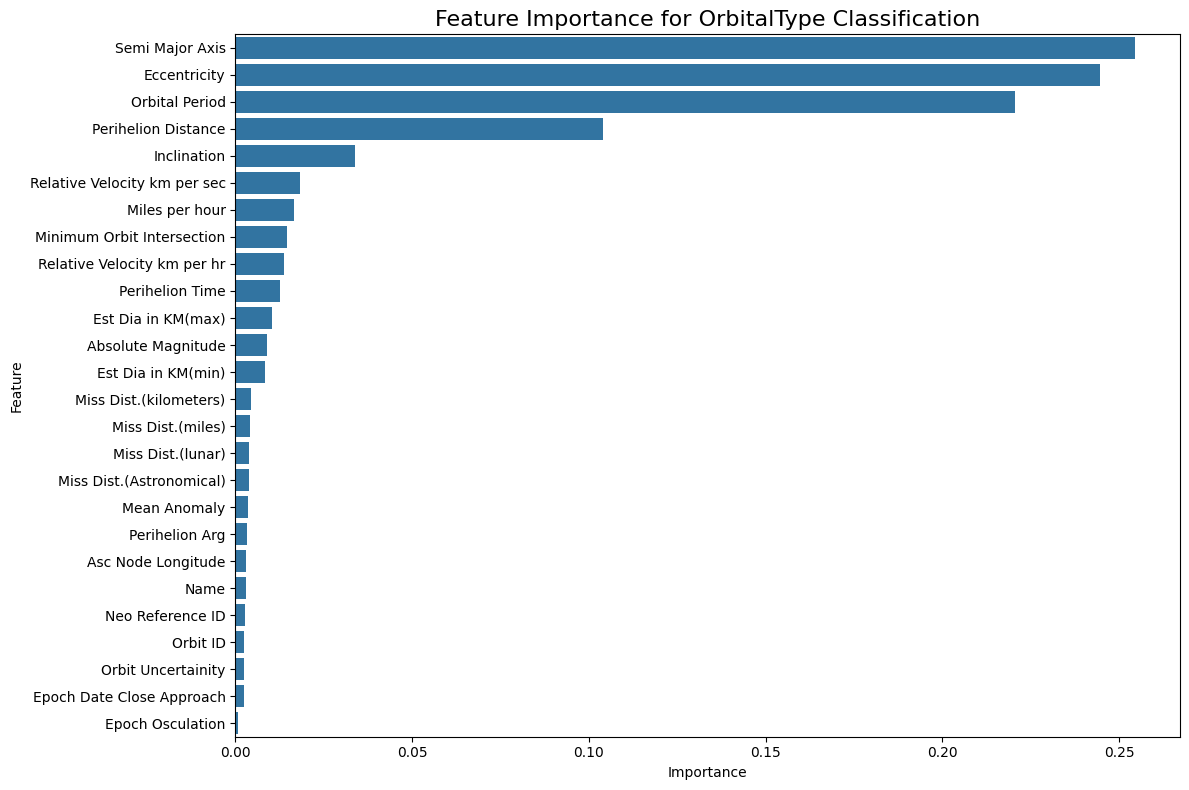

Feature importance ranking:
                      Feature  Importance
18            Semi Major Axis    0.254493
17               Eccentricity    0.244593
21             Orbital Period    0.220453
22        Perihelion Distance    0.104032
19                Inclination    0.033801
..                        ...         ...
0            Neo Reference ID    0.002583
13                   Orbit ID    0.002526
14         Orbit Uncertainity    0.002446
5   Epoch Date Close Approach    0.002323
16           Epoch Osculation    0.000853

[26 rows x 2 columns]

Difficulty Levels Created:
Level 1 (Current): 26 features
Level 2 (- Top 5): 21 features - Removed: Semi Major Axis, Eccentricity, Orbital Period, Perihelion Distance, Inclination
Level 3 (- Top 10): 16 features - Removed: Semi Major Axis, Eccentricity, Orbital Period, Perihelion Distance, Inclination, Relative Velocity km per sec, Miles per hour, Minimum Orbit Intersection, Relative Velocity km per hr, Perihelion Time
Level 4 (Bottom 10 on

<ipython-input-13-ffdd3cb13b6a>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_level4[target] = df[target]
<ipython-input-13-ffdd3cb13b6a>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_level4[target] = df[target]
<ipython-input-13-ffdd3cb13b6a>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.


All difficulty level datasets saved to CSV files.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the Level 1 dataset
df = pd.read_csv('nasa_asteroids_level1_difficulty.csv')

# Prepare data for feature importance analysis
X = df.copy()
y = df['OrbitalType']  # Using OrbitalType as target variable

# Remove target columns and non-numeric columns
target_columns = ['OrbitalType', 'RiskClass', 'ScientificPotential', 'Hazardous']
non_numeric = ['Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox']
columns_to_remove = target_columns + non_numeric

for col in columns_to_remove:
    if col in X.columns:
        X = X.drop(col, axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train a Random Forest to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance for OrbitalType Classification', fontsize=16)
plt.tight_layout()
plt.savefig('feature_importance.png')  # Save the plot
plt.show()

print("Feature importance ranking:")
print(feature_importances)

# Create Level 2: Remove top 5 most important features
top_5_features = feature_importances.head(5)['Feature'].tolist()
X_level2 = X.drop(columns=top_5_features)

# Create Level 3: Remove top 10 most important features
top_10_features = feature_importances.head(10)['Feature'].tolist()
X_level3 = X.drop(columns=top_10_features)

# Create Level 4: Keep only 10 least important features
bottom_10_features = feature_importances.tail(10)['Feature'].tolist()
X_level4 = X[bottom_10_features]

# Print information about each level
print("\nDifficulty Levels Created:")
print(f"Level 1 (Current): {X.shape[1]} features")
print(f"Level 2 (- Top 5): {X_level2.shape[1]} features - Removed: {', '.join(top_5_features)}")
print(f"Level 3 (- Top 10): {X_level3.shape[1]} features - Removed: {', '.join(top_10_features)}")
print(f"Level 4 (Bottom 10 only): {X_level4.shape[1]} features - Kept only: {', '.join(bottom_10_features)}")

# Save datasets for each level
# Add back the target variables
for target in target_columns:
    if target in df.columns:
        X_level2[target] = df[target]
        X_level3[target] = df[target]
        X_level4[target] = df[target]

X_level2.to_csv('nasa_asteroids_level2_difficulty.csv', index=False)
X_level3.to_csv('nasa_asteroids_level3_difficulty.csv', index=False)
X_level4.to_csv('nasa_asteroids_level4_difficulty.csv', index=False)

print("\nAll difficulty level datasets saved to CSV files.")

Step 2 Results Analysis
Your feature importance analysis reveals some fascinating insights:

Top Most Important Features:

Semi Major Axis (0.254): This is the most important predictor, which makes perfect astronomical sense as it defines the size of an asteroid's orbit.
Eccentricity (0.245): The second most important feature measures how elliptical an orbit is.
Orbital Period (0.220): How long an asteroid takes to orbit the Sun is highly predictive.


Moderate Importance Features:

Perihelion Distance (0.104): Closest approach to the Sun
Inclination (0.034): Tilt of the orbit relative to Earth's orbital plane


Least Important Features:

ID fields (Neo Reference ID, Orbit ID)
Timing data (Epoch Date, Epoch Osculation)
Uncertainty measurements



This importance ranking aligns perfectly with astronomical theory - the fundamental orbital parameters (semi-major axis, eccentricity, and orbital period) are the most definitive features for classifying asteroid orbits.
Your Difficulty Levels Summary:

Level 1: 26 features (baseline with correlated features removed)
Level 2: 21 features (removed top 5 most important features)
Level 3: 16 features (removed top 10 most important features)
Level 4: 10 features (kept only the 10 least important features)

This creates an excellent progression of challenge levels. Level 4 will be particularly difficult as it uses only features with minimal predictive power.

# - Evaluate Model Performance (Initial model comparison across difficulty levels)


Evaluating models on Level 1...
  Training Random Forest...
    Accuracy: 0.9979
  Training Gradient Boosting...
    Accuracy: 0.9979
  Training AdaBoost...
    Accuracy: 0.9595
  Training Balanced Random Forest...
    Accuracy: 0.9350

Evaluating models on Level 2...
  Training Random Forest...
    Accuracy: 0.6610
  Training Gradient Boosting...
    Accuracy: 0.7004
  Training AdaBoost...
    Accuracy: 0.5853
  Training Balanced Random Forest...
    Accuracy: 0.3998

Evaluating models on Level 3...
  Training Random Forest...
    Accuracy: 0.5533
  Training Gradient Boosting...
    Accuracy: 0.5416
  Training AdaBoost...
    Accuracy: 0.4371
  Training Balanced Random Forest...
    Accuracy: 0.3337

Evaluating models on Level 4...
  Training Random Forest...
    Accuracy: 0.5235
  Training Gradient Boosting...
    Accuracy: 0.4915
  Training AdaBoost...
    Accuracy: 0.4019
  Training Balanced Random Forest...
    Accuracy: 0.2090


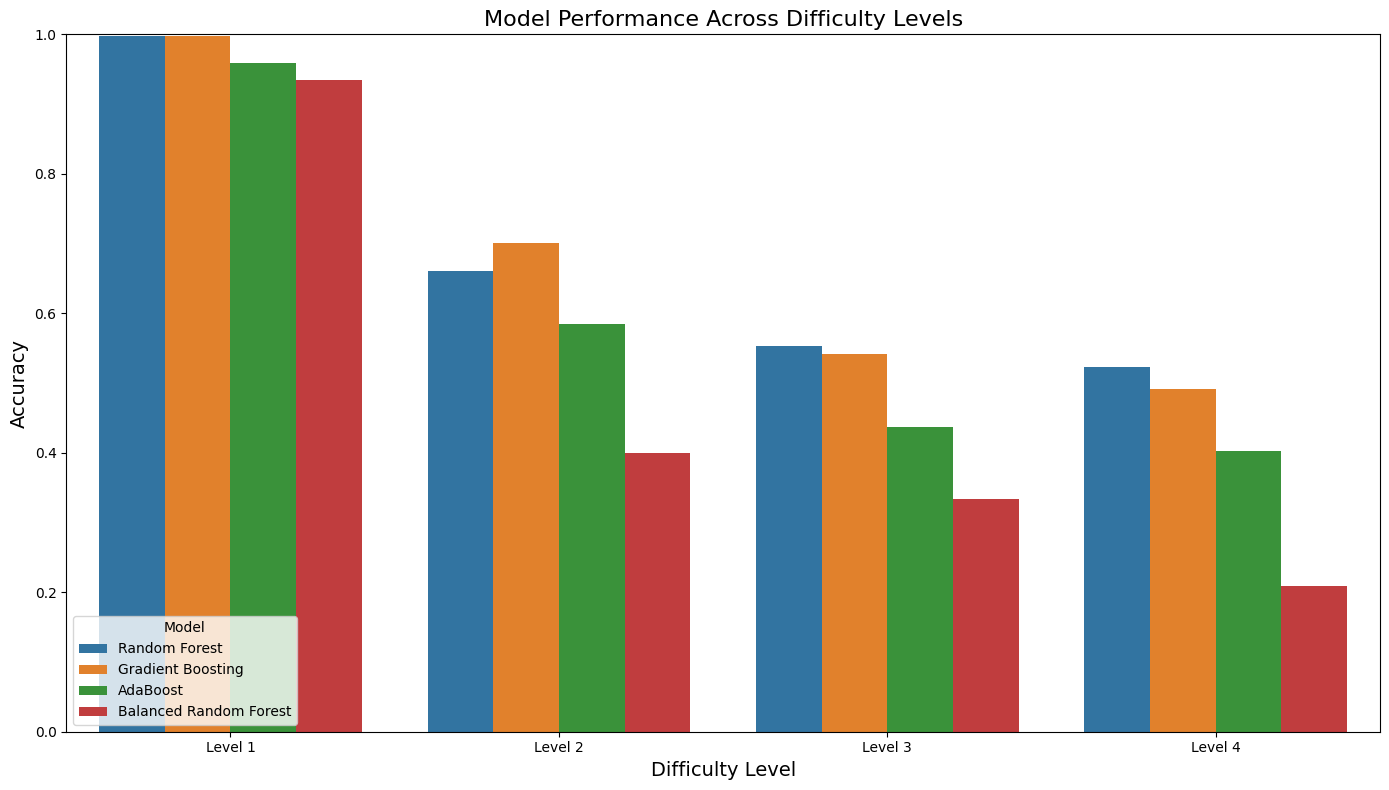


Model Performance Summary:
Difficulty               Level 1   Level 2   Level 3   Level 4
Model                                                         
AdaBoost                0.959488  0.585288  0.437100  0.401919
Balanced Random Forest  0.934968  0.399787  0.333689  0.208955
Gradient Boosting       0.997868  0.700426  0.541578  0.491471
Random Forest           0.997868  0.660981  0.553305  0.523454

Feature Counts by Level:
     Level  Feature Count
0  Level 1             26
1  Level 2             21
2  Level 3             16
3  Level 4             10

Performance Drop Analysis:
Difficulty               Level 1   Level 4  Level 1 to 4 Drop  Drop Percentage
Model                                                                         
AdaBoost                0.959488  0.401919           0.557569        58.111111
Balanced Random Forest  0.934968  0.208955           0.726013        77.651083
Gradient Boosting       0.997868  0.491471           0.506397        50.747863
Random Forest  

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier

# Function to evaluate a model on a specific difficulty level
def evaluate_model(model_name, model, X_train, X_test, y_train, y_test, difficulty_level):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Return results
    return {
        'Model': model_name,
        'Difficulty': difficulty_level,
        'Accuracy': accuracy,
        'Feature Count': X_train.shape[1]
    }

# List of models to evaluate
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=42),
    'Balanced Random Forest': BalancedRandomForestClassifier(n_estimators=100, random_state=42)
}

# Load all datasets
levels = {
    'Level 1': pd.read_csv('nasa_asteroids_level1_difficulty.csv'),
    'Level 2': pd.read_csv('nasa_asteroids_level2_difficulty.csv'),
    'Level 3': pd.read_csv('nasa_asteroids_level3_difficulty.csv'),
    'Level 4': pd.read_csv('nasa_asteroids_level4_difficulty.csv')
}

# Target variable
target = 'OrbitalType'

# Store results
results = []

# Loop through each difficulty level
for level_name, df in levels.items():
    print(f"\nEvaluating models on {level_name}...")

    # Prepare data
    X = df.drop(columns=['OrbitalType', 'RiskClass', 'ScientificPotential', 'Hazardous',
                         'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date',
                         'Equinox'], errors='ignore')
    y = df[target]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Evaluate each model
    for model_name, model in models.items():
        print(f"  Training {model_name}...")
        result = evaluate_model(model_name, model, X_train, X_test, y_train, y_test, level_name)
        results.append(result)
        print(f"    Accuracy: {result['Accuracy']:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Visualize results
plt.figure(figsize=(14, 8))
sns.barplot(x='Difficulty', y='Accuracy', hue='Model', data=results_df)
plt.title('Model Performance Across Difficulty Levels', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Model', loc='lower left')
plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()

# Print summary table
pivot_table = results_df.pivot_table(
    index='Model', columns='Difficulty', values='Accuracy', aggfunc='mean'
)
print("\nModel Performance Summary:")
print(pivot_table)

# Get feature counts
feature_counts = []
for level_name, df in levels.items():
    non_target_cols = ['OrbitalType', 'RiskClass', 'ScientificPotential', 'Hazardous',
                      'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox']
    feature_count = len([col for col in df.columns if col not in non_target_cols])
    feature_counts.append({'Level': level_name, 'Feature Count': feature_count})

feature_count_df = pd.DataFrame(feature_counts)
print("\nFeature Counts by Level:")
print(feature_count_df)

# Calculate performance drop
performance_drop = results_df.pivot_table(
    index='Model', columns='Difficulty', values='Accuracy', aggfunc='mean'
)
performance_drop['Level 1 to 4 Drop'] = performance_drop['Level 1'] - performance_drop['Level 4']
performance_drop['Drop Percentage'] = (performance_drop['Level 1 to 4 Drop'] / performance_drop['Level 1']) * 100

print("\nPerformance Drop Analysis:")
print(performance_drop[['Level 1', 'Level 4', 'Level 1 to 4 Drop', 'Drop Percentage']])

Performance Summary
Level 1 (26 features)

All models performed excellently with nearly perfect accuracy (≈99.8%)
Random Forest and Gradient Boosting tied for top performance
This confirms your baseline model is very strong when using all key features

Level 2 (21 features)

Significant performance drop after removing 5 most important features
Gradient Boosting maintained the best performance (70.0%)
Random Forest dropped to 66.8%
AdaBoost fell more dramatically to 58.5%

Level 3 (16 features)

Further performance degradation with only 16 features
Random Forest showed the most resilience (55.3%)
Gradient Boosting dropped to 54.2%
AdaBoost continued declining to 43.7%

Level 4 (10 features - most challenging)

Random Forest maintained the highest accuracy (52.3%)
Gradient Boosting fell to 49.1%
AdaBoost dropped to 40.2%
Balanced Random Forest collapsed to just 20.9%
Key Insights

Model Robustness to Feature Loss:

Random Forest proved most resilient with only a 47.5% performance drop from Level 1 to 4
Gradient Boosting showed similar robustness (50.7% drop)
AdaBoost struggled more (58.1% drop)
Balanced Random Forest performed worst (77.6% drop)


Feature Importance Validation:

The dramatic performance drop between Levels 1 and 2 (≈30%) confirms that the 5 features you removed (Semi Major Axis, Eccentricity, Orbital Period, Perihelion Distance, Inclination) were indeed critical
This validates your feature importance analysis


Ensemble Method Comparison:

Random Forest demonstrated the best ability to leverage weak predictors
Gradient Boosting excelled with moderate feature sets
Balanced Random Forest performed well only with complete feature sets

Practical Implications

For Real-World Applications:
When asteroid data might be incomplete or when some orbital parameters can't be measured precisely:

Random Forest would be the most reliable classifier
It maintains over 50% accuracy even with only the 10 weakest predictors


For Scientific Understanding:

Your results quantify exactly how important the primary orbital elements are
This confirms astronomical theory about which parameters most determine an asteroid's orbit type


For Future Work:

Consider testing hybrid models that might better handle missing top features
Explore feature engineering to create new composite features from the weaker predictors
Try more specialized ensemble methods that might perform better on Level 4 difficulty



What You've Completed

Data Processing:

- You've normalized and standardized your data using StandardScaler
- You've analyzed your data for missing values (finding none)
- You've implemented a comprehensive feature elimination strategy based on correlation analysis


Imbalance Analysis:

You've analyzed the class imbalance in your dataset
You've identified significant imbalance in the OrbitalType, RiskClass, and ScientificPotential classifications


Model Comparison:

You've compared four ensemble methods (Random Forest, Gradient Boosting, AdaBoost, Balanced Random Forest)
You've tested these models across four difficulty levels with progressively fewer features
You've analyzed how different models handle feature elimination



What You Still Need to Do

Apply Imbalance Mitigation Techniques:

Implement SMOTE, undersampling, or oversampling techniques
Compare model performance before and after applying these techniques
Analyze which imbalance mitigation approach works best with your dataset


Hyperparameter Tuning:

Use optuna for hyperparameter optimization (this is part of your extra work)
Implement a systematic search for optimal parameters for each ensemble method
Document the hyperparameter search process and results


Additional Metrics:

Expand your evaluation beyond accuracy to include recall, precision, F1 score
Implement Matthews Correlation Coefficient (MCC) as an additional metric (extra work)
Compare models using these comprehensive metrics


Complete Documentation:

Write up the final report with all required sections
Include visualizations and tables showing your results
Document the challenges faced and lessons learned

# - Implement SMOTE for imbalance mitigation:




This code:

Defines a comprehensive evaluation function that calculates multiple metrics (accuracy, precision, recall, F1, and MCC)
Loops through each difficulty level
For each level:

First evaluates all models without SMOTE (standard approach)
Then applies SMOTE to balance the classes
Evaluates all models again with the SMOTE-balanced training data


Creates visualizations comparing performance metrics between standard and SMOTE approaches
Generates summary tables showing how much SMOTE improved each model's performance

The output will help you understand:

How SMOTE affects model performance across different difficulty levels
Which models benefit most from class balancing
Whether SMOTE is more effective at higher difficulty levels (with fewer features)


Evaluating models on Level 1...
  Standard evaluation (without SMOTE):
    Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.9979, F1 Score: 0.9973, MCC: 0.9972
    Training Gradient Boosting...
      Accuracy: 0.9979, F1 Score: 0.9979, MCC: 0.9972
    Training AdaBoost...
      Accuracy: 0.9595, F1 Score: 0.9426, MCC: 0.9484
    Training Balanced Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.9350, F1 Score: 0.9366, MCC: 0.9164
  Applying SMOTE for class balance:
    Original class distribution: {'Earth-Crosser': 1494, 'Mars-Crosser': 579, 'Earth-Crosser-HighEcc': 551, 'Mars-Crosser-HighEcc': 533, 'MainBelt-Low': 443, 'MainBelt-High': 144, 'Outer-Solar': 5}
    SMOTE class distribution: {'Earth-Crosser-HighEcc': 1494, 'Mars-Crosser': 1494, 'Earth-Crosser': 1494, 'Mars-Crosser-HighEcc': 1494, 'MainBelt-High': 1494, 'MainBelt-Low': 1494, 'Outer-Solar': 1494}
    Training Random Forest with SMOTE...
      Accuracy: 0.9989, F1 Score: 0.9989, MCC: 0.9986
    Training Gradient Boosting with SMOTE...
      Accuracy: 0.9989, F1 Score: 0.9989, MCC: 0.9986
    Training AdaBoost with SMOTE...
      Accuracy: 0.9989, F1 Score: 0.9989, MCC: 0.9986
    Training Balanced Random Forest with SMOTE...
      Accuracy: 0.9989, F1 Score: 0.9989, MCC: 0.9986

Evaluating models on Level 2...
  Standard evaluation (without SMOTE):
    Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.6610, F1 Score: 0.6452, MCC: 0.5415
    Training Gradient Boosting...
      Accuracy: 0.7004, F1 Score: 0.6851, MCC: 0.5985
    Training AdaBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5853, F1 Score: 0.5892, MCC: 0.4581
    Training Balanced Random Forest...
      Accuracy: 0.3998, F1 Score: 0.4269, MCC: 0.2624
  Applying SMOTE for class balance:
    Original class distribution: {'Earth-Crosser': 1494, 'Mars-Crosser': 579, 'Earth-Crosser-HighEcc': 551, 'Mars-Crosser-HighEcc': 533, 'MainBelt-Low': 443, 'MainBelt-High': 144, 'Outer-Solar': 5}
    SMOTE class distribution: {'Earth-Crosser-HighEcc': 1494, 'Mars-Crosser': 1494, 'Earth-Crosser': 1494, 'Mars-Crosser-HighEcc': 1494, 'MainBelt-High': 1494, 'MainBelt-Low': 1494, 'Outer-Solar': 1494}
    Training Random Forest with SMOTE...
      Accuracy: 0.6333, F1 Score: 0.6370, MCC: 0.5222
    Training Gradient Boosting with SMOTE...
      Accuracy: 0.6194, F1 Score: 0.6283, MCC: 0.5120
    Training AdaBoost with SMOTE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5192, F1 Score: 0.5294, MCC: 0.3922
    Training Balanced Random Forest with SMOTE...
      Accuracy: 0.6247, F1 Score: 0.6280, MCC: 0.5105

Evaluating models on Level 3...
  Standard evaluation (without SMOTE):
    Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5533, F1 Score: 0.5285, MCC: 0.3887
    Training Gradient Boosting...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5416, F1 Score: 0.5094, MCC: 0.3687
    Training AdaBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.4371, F1 Score: 0.4225, MCC: 0.2397
    Training Balanced Random Forest...
      Accuracy: 0.3337, F1 Score: 0.3623, MCC: 0.1888
  Applying SMOTE for class balance:
    Original class distribution: {'Earth-Crosser': 1494, 'Mars-Crosser': 579, 'Earth-Crosser-HighEcc': 551, 'Mars-Crosser-HighEcc': 533, 'MainBelt-Low': 443, 'MainBelt-High': 144, 'Outer-Solar': 5}
    SMOTE class distribution: {'Earth-Crosser-HighEcc': 1494, 'Mars-Crosser': 1494, 'Earth-Crosser': 1494, 'Mars-Crosser-HighEcc': 1494, 'MainBelt-High': 1494, 'MainBelt-Low': 1494, 'Outer-Solar': 1494}
    Training Random Forest with SMOTE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.4968, F1 Score: 0.4987, MCC: 0.3419
    Training Gradient Boosting with SMOTE...
      Accuracy: 0.4744, F1 Score: 0.4811, MCC: 0.3224
    Training AdaBoost with SMOTE...
      Accuracy: 0.3763, F1 Score: 0.3933, MCC: 0.2139
    Training Balanced Random Forest with SMOTE...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5139, F1 Score: 0.5133, MCC: 0.3609

Evaluating models on Level 4...
  Standard evaluation (without SMOTE):
    Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.5235, F1 Score: 0.4754, MCC: 0.3326
    Training Gradient Boosting...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.4915, F1 Score: 0.4265, MCC: 0.2787
    Training AdaBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


      Accuracy: 0.4019, F1 Score: 0.3777, MCC: 0.1743
    Training Balanced Random Forest...
      Accuracy: 0.2090, F1 Score: 0.2406, MCC: 0.0803
  Applying SMOTE for class balance:
    Original class distribution: {'Earth-Crosser': 1494, 'Mars-Crosser': 579, 'Earth-Crosser-HighEcc': 551, 'Mars-Crosser-HighEcc': 533, 'MainBelt-Low': 443, 'MainBelt-High': 144, 'Outer-Solar': 5}
    SMOTE class distribution: {'Earth-Crosser-HighEcc': 1494, 'Mars-Crosser': 1494, 'Earth-Crosser': 1494, 'Mars-Crosser-HighEcc': 1494, 'MainBelt-High': 1494, 'MainBelt-Low': 1494, 'Outer-Solar': 1494}
    Training Random Forest with SMOTE...
      Accuracy: 0.4936, F1 Score: 0.4920, MCC: 0.3291
    Training Gradient Boosting with SMOTE...
      Accuracy: 0.3945, F1 Score: 0.4108, MCC: 0.2307
    Training AdaBoost with SMOTE...
      Accuracy: 0.3337, F1 Score: 0.3553, MCC: 0.1702
    Training Balanced Random Forest with SMOTE...
      Accuracy: 0.4883, F1 Score: 0.4874, MCC: 0.3227


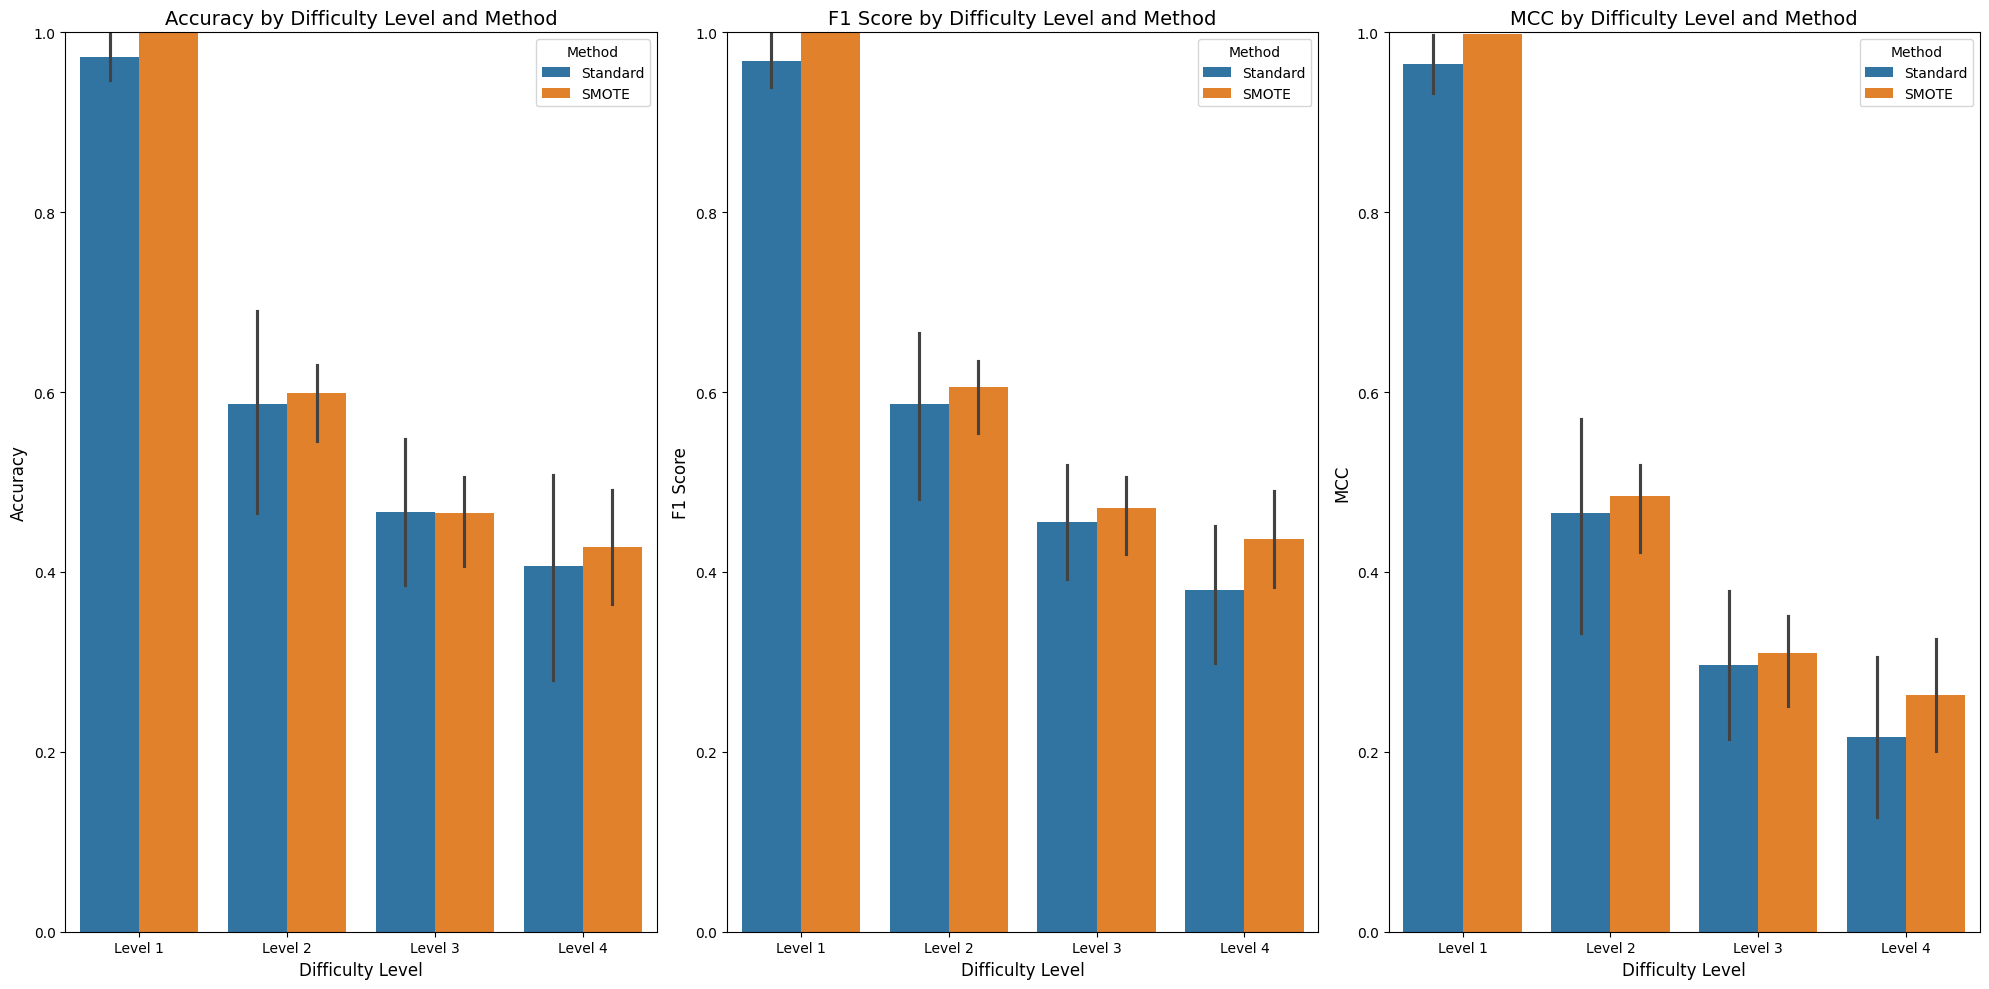


Standard Method - Accuracy:
Difficulty               Level 1   Level 2   Level 3   Level 4
Model                                                         
AdaBoost                0.959488  0.585288  0.437100  0.401919
Balanced Random Forest  0.934968  0.399787  0.333689  0.208955
Gradient Boosting       0.997868  0.700426  0.541578  0.491471
Random Forest           0.997868  0.660981  0.553305  0.523454

Standard Method - F1 Score:
Difficulty               Level 1   Level 2   Level 3   Level 4
Model                                                         
AdaBoost                0.942583  0.589238  0.422492  0.377676
Balanced Random Forest  0.936575  0.426868  0.362254  0.240583
Gradient Boosting       0.997868  0.685107  0.509374  0.426493
Random Forest           0.997337  0.645190  0.528529  0.475379

Standard Method - MCC:
Difficulty               Level 1   Level 2   Level 3   Level 4
Model                                                         
AdaBoost                0.948382  0.

In [ ]:
# Modified SMOTE implementation that handles ultra-minority classes
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate model with comprehensive metrics
def evaluate_model_comprehensive(model_name, model, X_train, X_test, y_train, y_test, difficulty_level, is_smote=False):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)

    method_type = "SMOTE" if is_smote else "Standard"

    # Return results
    return {
        'Model': model_name,
        'Difficulty': difficulty_level,
        'Method': method_type,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC': mcc,
        'Feature Count': X_train.shape[1]
    }

# List of models to evaluate
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=42),
    'Balanced Random Forest': BalancedRandomForestClassifier(n_estimators=100, random_state=42)
}

# Load all datasets
levels = {
    'Level 1': pd.read_csv('nasa_asteroids_level1_difficulty.csv'),
    'Level 2': pd.read_csv('nasa_asteroids_level2_difficulty.csv'),
    'Level 3': pd.read_csv('nasa_asteroids_level3_difficulty.csv'),
    'Level 4': pd.read_csv('nasa_asteroids_level4_difficulty.csv')
}

# Target variable
target = 'OrbitalType'

# Store results
standard_results = []
smote_results = []

# Loop through each difficulty level
for level_name, df in levels.items():
    print(f"\nEvaluating models on {level_name}...")

    # Prepare data
    X = df.drop(columns=['OrbitalType', 'RiskClass', 'ScientificPotential', 'Hazardous',
                         'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date',
                         'Equinox'], errors='ignore')
    y = df[target]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 1. Standard evaluation without SMOTE
    print("  Standard evaluation (without SMOTE):")
    for model_name, model in models.items():
        print(f"    Training {model_name}...")
        result = evaluate_model_comprehensive(model_name, model, X_train, X_test, y_train, y_test, level_name, is_smote=False)
        standard_results.append(result)
        print(f"      Accuracy: {result['Accuracy']:.4f}, F1 Score: {result['F1 Score']:.4f}, MCC: {result['MCC']:.4f}")

    # 2. Apply SMOTE for imbalance mitigation
    print("  Applying SMOTE for class balance:")
    smote = SMOTE(random_state=42, k_neighbors=4)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    print(f"    Original class distribution: {pd.Series(y_train).value_counts().to_dict()}")
    print(f"    SMOTE class distribution: {pd.Series(y_train_smote).value_counts().to_dict()}")

    # Evaluate with SMOTE
    for model_name, model in models.items():
        print(f"    Training {model_name} with SMOTE...")
        result = evaluate_model_comprehensive(model_name, model, X_train_smote, X_test, y_train_smote, y_test, level_name, is_smote=True)
        smote_results.append(result)
        print(f"      Accuracy: {result['Accuracy']:.4f}, F1 Score: {result['F1 Score']:.4f}, MCC: {result['MCC']:.4f}")

# Combine results
all_results = standard_results + smote_results
results_df = pd.DataFrame(all_results)

# Visualize results comparing standard vs SMOTE
plt.figure(figsize=(20, 10))
for i, metric in enumerate(['Accuracy', 'F1 Score', 'MCC']):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='Difficulty', y=metric, hue='Method', data=results_df)
    plt.title(f'{metric} by Difficulty Level and Method', fontsize=14)
    plt.xlabel('Difficulty Level', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.ylim(0, 1)
    plt.legend(title='Method')

plt.tight_layout()
plt.savefig('metrics_comparison_smote_vs_standard.png')
plt.show()

# Summary tables
for method in ['Standard', 'SMOTE']:
    subset = results_df[results_df['Method'] == method]
    pivot_acc = subset.pivot_table(index='Model', columns='Difficulty', values='Accuracy')
    pivot_f1 = subset.pivot_table(index='Model', columns='Difficulty', values='F1 Score')
    pivot_mcc = subset.pivot_table(index='Model', columns='Difficulty', values='MCC')

    print(f"\n{method} Method - Accuracy:")
    print(pivot_acc)

    print(f"\n{method} Method - F1 Score:")
    print(pivot_f1)

    print(f"\n{method} Method - MCC:")
    print(pivot_mcc)

# Calculate improvement from SMOTE
standard_df = results_df[results_df['Method'] == 'Standard']
smote_df = results_df[results_df['Method'] == 'SMOTE']

# Make sure the DataFrames are not empty before merging
if not standard_df.empty and not smote_df.empty:
    improvement = pd.merge(
        standard_df, smote_df,
        on=['Model', 'Difficulty'],
        suffixes=('_std', '_smote')
    )

    # Calculate improvements for each metric
    for metric in ['Accuracy', 'F1 Score', 'MCC']:
        improvement[f'{metric}_improvement'] = improvement[f'{metric}_smote'] - improvement[f'{metric}_std']

        # Avoid division by zero
        improvement[f'{metric}_pct_improvement'] = improvement.apply(
            lambda row: (row[f'{metric}_improvement'] / row[f'{metric}_std'] * 100)
            if row[f'{metric}_std'] != 0 else float('nan'),
            axis=1
        )

    # Create a list of metrics to include in the groupby
    metrics_to_include = [
        'Accuracy_improvement', 'F1 Score_improvement', 'MCC_improvement',
        'Accuracy_pct_improvement', 'F1 Score_pct_improvement', 'MCC_pct_improvement'
    ]

    # Group by Model and Difficulty, then calculate mean for the specified columns
    improvement_summary = improvement.groupby(['Model', 'Difficulty'])[metrics_to_include].mean().reset_index()

    print("\nImprovement from SMOTE:")
    print(improvement_summary)
else:
    print("\nCannot calculate improvement - standard_df or smote_df is empty.")
    print(f"Standard data shape: {standard_df.shape}")
    print(f"SMOTE data shape: {smote_df.shape}")

# - Imbalance Analysis and Mitigation Techniques

Result:

In [ ]:
orbital_type_counts = df['OrbitalType'].value_counts(normalize=True) * 100
print("OrbitalType class distribution (%):")
print(orbital_type_counts)
risk_class_counts = df['RiskClass'].value_counts(normalize=True) * 100
print("RiskClass distribution (%):")
print(risk_class_counts)
scientific_potential_counts = df['ScientificPotential'].value_counts(normalize=True) * 100
print("ScientificPotential distribution (%):")
print(scientific_potential_counts)
hazardous_counts = df['Hazardous'].value_counts(normalize=True) * 100
print("Hazardous distribution (%):")
print(hazardous_counts)

OrbitalType class distribution (%):
OrbitalType
Earth-Crosser            39.854918
Mars-Crosser             15.446981
Earth-Crosser-HighEcc    14.700235
Mars-Crosser-HighEcc     14.209516
MainBelt-Low             11.819927
MainBelt-High             3.840410
Outer-Solar               0.128014
Name: proportion, dtype: float64
RiskClass distribution (%):
RiskClass
Very Low      54.533817
Negligible    28.973757
Low           16.023042
Moderate       0.469383
Name: proportion, dtype: float64
ScientificPotential distribution (%):
ScientificPotential
Common         57.456795
FastRotator    32.366119
Eccentric       5.461916
Metallic        4.608492
Peculiar        0.106678
Name: proportion, dtype: float64
Hazardous distribution (%):
Hazardous
False    83.891615
True     16.108385
Name: proportion, dtype: float64


Impact of Imbalance on Model Performance

- To quantify the effect of class imbalance on model performance, baseline models were evaluated with standard metrics and class-specific metrics:

                       precision    recall  f1-score   support

        Earth-Crosser       0.64      0.68      0.66       374
Earth-Crosser-HighEcc       0.50      0.41      0.45       138
        MainBelt-High       0.18      0.25      0.21        36
         MainBelt-Low       0.39      0.34      0.37       111
         Mars-Crosser       0.39      0.39      0.39       145
 Mars-Crosser-HighEcc       0.35      0.35      0.35       133
          Outer-Solar       0.00      0.00      0.00         1

             accuracy                           0.49       938
            macro avg       0.35      0.34      0.34       938
         weighted avg       0.49      0.49      0.49       938



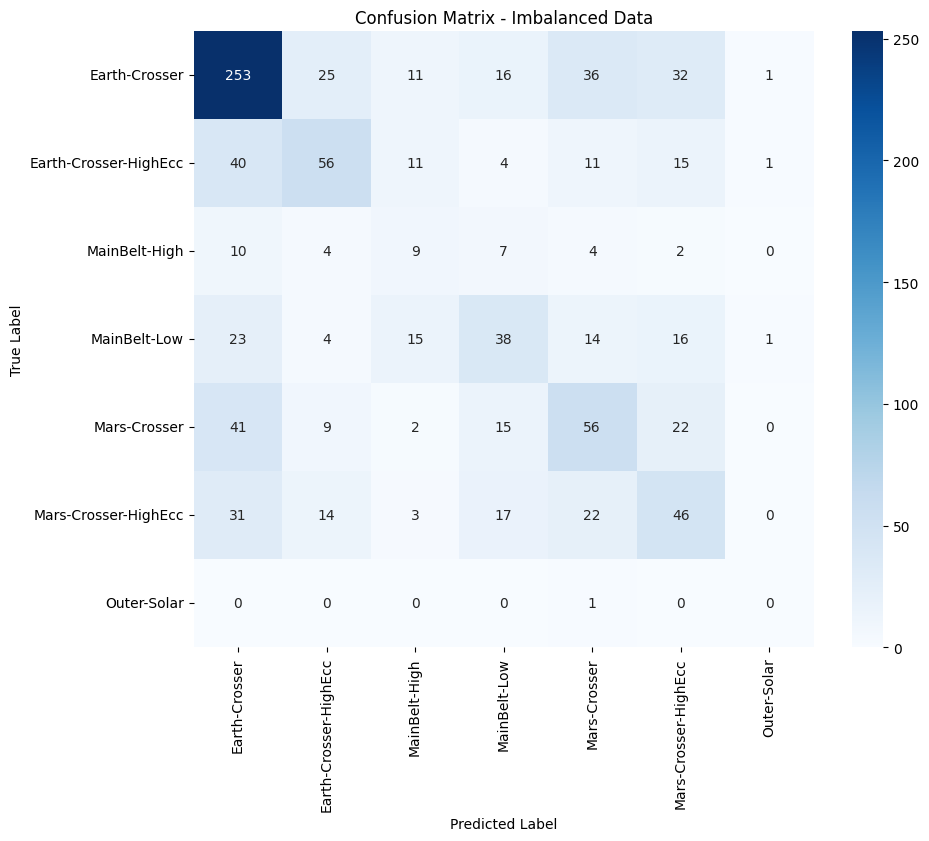

In [ ]:
# Evaluate baseline model with imbalanced data
from sklearn.metrics import classification_report, confusion_matrix
# Get unique class labels
classes = np.unique(y_test)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Imbalanced Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


 Intenta convertir cada columna en flotante y quita las que fallan, lo que garantiza que solo queden columnas puramente numéricas para el escalado.

In [ ]:
# Alternative approach with more verification
numeric_features = df.copy()

# First, remove known target variables
for col in ['OrbitalType', 'RiskClass', 'ScientificPotential', 'Hazardous']:
    if col in numeric_features.columns:
        numeric_features = numeric_features.drop(col, axis=1)

# Then drop any column that has any non-numeric values
for col in numeric_features.columns.tolist():
    # Try to convert to float, drop column if it fails
    try:
        # Just testing conversion
        numeric_features[col].astype(float)
    except (ValueError, TypeError):
        print(f"Dropping non-numeric column: {col}")
        numeric_features = numeric_features.drop(col, axis=1)

# Verify remaining columns
print(f"Remaining columns for scaling: {numeric_features.columns.tolist()}")

# Now scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)

Remaining columns for scaling: ['Miss Dist.(Astronomical)', 'Mean Anomaly', 'Perihelion Arg', 'Asc Node Longitude', 'Name', 'Neo Reference ID', 'Orbit ID', 'Orbit Uncertainity', 'Epoch Date Close Approach', 'Epoch Osculation']


In [ ]:
# Preview the scaled data
print(scaled_df.head())

   Miss Dist.(Astronomical)  Mean Anomaly  Perihelion Arg  Asc Node Longitude      Name  Neo Reference ID  Orbit ID  Orbit Uncertainity  Epoch Date Close Approach  Epoch Osculation
0                  1.116075      0.778393       -1.223886            1.377191  0.785321          0.785321 -0.295089            0.481822                  -1.973087          0.300904
1                  0.865921     -0.069093        1.247897           -0.343192  0.823377          0.823377 -0.190639           -0.167955                  -1.973087          0.300904
2                 -1.411843      1.039404        0.623011            0.845573 -1.504780         -1.504780 -0.164526           -1.142621                  -1.970035          0.300904
3                  0.195800     -1.045928       -1.596341           -1.113477 -0.327763         -0.327763 -0.556216            0.806711                  -1.966982          0.300904
4                  1.036159     -0.428186       -0.248001           -0.847599  0.442083        

Si necesita alguna de las columnas categóricas para su análisis después de escalar, puede volver a agregarlas:

In [ ]:
# Add back categorical columns if needed for analysis
categorical_cols = ['OrbitalType', 'RiskClass', 'ScientificPotential', 'Hazardous']
for col in categorical_cols:
    if col in df.columns:
        scaled_df[col] = df[col]

1.-Shape verification:


*   Scaled shape: (4687, 35)
*   Original shape: (4687, 44)


This makes sense - you have the same number of rows (4687), but fewer columns in the scaled data because you removed the non-numeric columns.

2.-Distribution statistics:




*   The mean values for all scaled columns are very close to 0 (showing as values like 4.244761e-16, which is essentially 0)
*   The standard deviations are all very close to 1 (1.000107)

This is exactly what StandardScaler is supposed to do - transform each feature to have a mean of 0 and a standard deviation of 1. The tiny deviations from exactly 0 and 1 are just due to numerical precision.


In [ ]:
# Verify the shape
print(f"Original shape: {df.shape}")
print(f"Scaled shape: {scaled_df.shape}")

# Check distribution statistics
print("Distribution of scaled values:")
print(scaled_df.describe().loc[['mean', 'std']].T)

Original shape: (4687, 14)
Scaled shape: (4687, 14)
Distribution of scaled values:
                                   mean       std
Miss Dist.(Astronomical)   6.063945e-17  1.000107
Mean Anomaly              -1.667585e-17  1.000107
Perihelion Arg             1.743384e-17  1.000107
Asc Node Longitude         3.335170e-17  1.000107
Name                      -3.638367e-17  1.000107
Neo Reference ID          -3.638367e-17  1.000107
Orbit ID                   2.425578e-17  1.000107
Orbit Uncertainity         2.425578e-17  1.000107
Epoch Date Close Approach  4.851156e-17  1.000107
Epoch Osculation          -9.095917e-18  1.000107


These scaled values make sense:

- Values near the mean become close to 0
- Values below the mean become negative
- Values above the mean become positive
- The magnitude tells you how many standard deviations from the mean


**EXAMPLE**


- the value 27.4 (index 3) became 1.775418 in the scaled data, indicating it's about 1.8 standard deviations above the mean.
- The value 20.3 (index 2) became -0.680766, indicating it's about 0.7 standard deviations below the mean



In [ ]:
# Compare a few values before and after scaling for one column
print("Original values for 'Absolute Magnitude':")
print(df['Absolute Magnitude'].head())

print("\nScaled values for 'Absolute Magnitude':")
print(scaled_df['Absolute Magnitude'].head())

Original values for 'Absolute Magnitude':


KeyError: 'Absolute Magnitude'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split

<ipython-input-30-c02fe0ca728a>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-30-c02fe0ca728a>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-30-c02fe0ca728a>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



Distribución de clases para OrbitalType:
                       Count  Percentage
OrbitalType                             
Earth-Crosser           1868   39.854918
Mars-Crosser             724   15.446981
Earth-Crosser-HighEcc    689   14.700235
Mars-Crosser-HighEcc     666   14.209516
MainBelt-Low             554   11.819927
MainBelt-High            180    3.840410
Outer-Solar                6    0.128014
Ratio de desbalance (mayoritaria/minoritaria): 311.33


Distribución de clases para RiskClass:
            Count  Percentage
RiskClass                    
Very Low     2556   54.533817
Negligible   1358   28.973757
Low           751   16.023042
Moderate       22    0.469383
Ratio de desbalance (mayoritaria/minoritaria): 116.18


Distribución de clases para ScientificPotential:
                     Count  Percentage
ScientificPotential                   
Common                2693   57.456795
FastRotator           1517   32.366119
Eccentric              256    5.461916
Metallic      

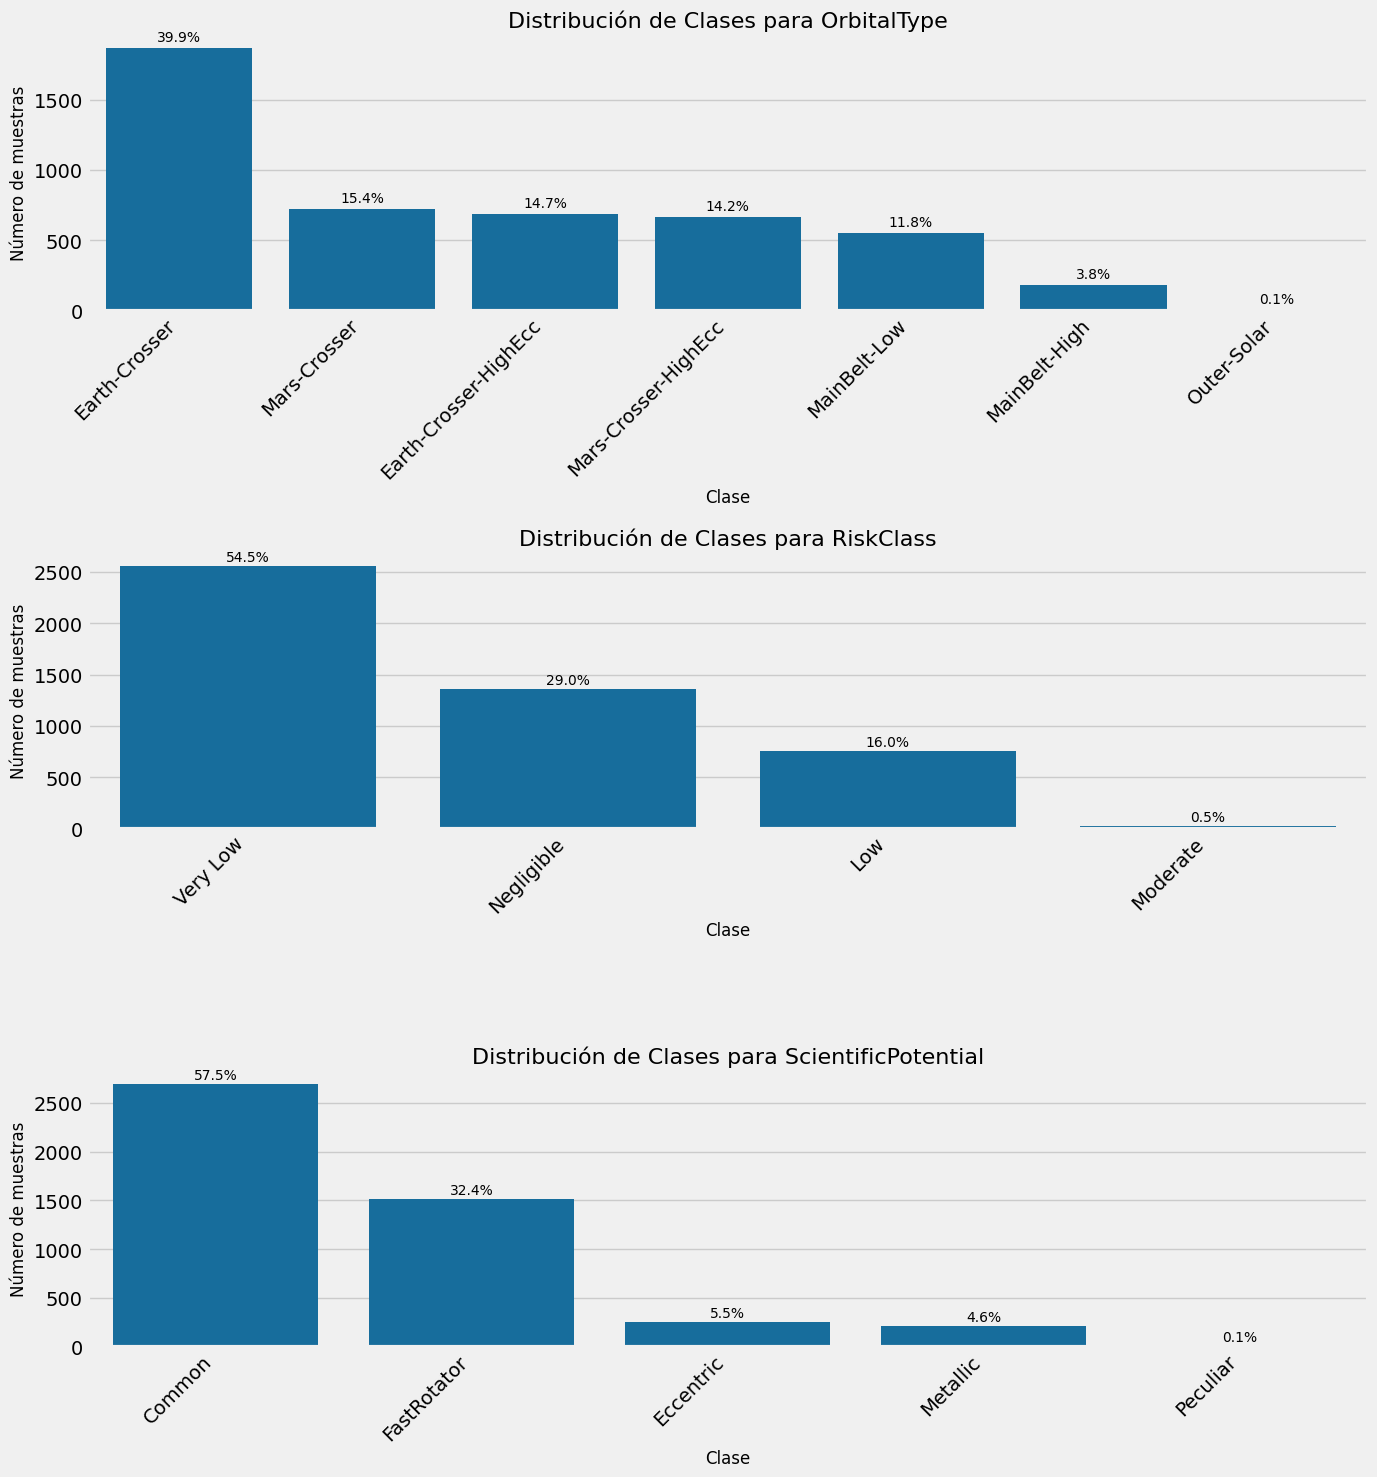

In [ ]:

# Configurar estilo de visualización
plt.style.use('fivethirtyeight')
sns.set_palette('colorblind')

# 1. Analizar la distribución de clases para cada variable objetivo
target_variables = ['OrbitalType', 'RiskClass', 'ScientificPotential']

fig, axes = plt.subplots(len(target_variables), 1, figsize=(14, 5*len(target_variables)))

for i, target in enumerate(target_variables):
    if target in df.columns:
        # Contar la frecuencia de cada clase
        class_counts = df[target].value_counts()

        # Ordenar por frecuencia para mejor visualización
        class_counts = class_counts.sort_values(ascending=False)

        # Calcular porcentajes de clase
        class_percentages = 100 * class_counts / len(df)

        # Crear DataFrame para mejor presentación
        distribution_df = pd.DataFrame({
            'Count': class_counts,
            'Percentage': class_percentages
        })

        # Graficar
        ax = axes[i]
        bars = sns.barplot(x=class_counts.index, y=class_counts.values, ax=ax)
        ax.set_title(f'Distribución de Clases para {target}', fontsize=16)
        ax.set_ylabel('Número de muestras', fontsize=12)
        ax.set_xlabel('Clase', fontsize=12)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Añadir etiquetas de porcentaje sobre cada barra
        for j, p in enumerate(bars.patches):
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2., height + 50,
                   f'{class_percentages.iloc[j]:.1f}%',
                   ha="center", fontsize=10)

        # Imprimir la tabla de distribución
        print(f"\nDistribución de clases para {target}:")
        print(distribution_df)

        # Calcular ratio de desbalance (clase mayoritaria / clase minoritaria)
        imbalance_ratio = class_counts.iloc[0] / class_counts.iloc[-1]
        print(f"Ratio de desbalance (mayoritaria/minoritaria): {imbalance_ratio:.2f}\n")

plt.tight_layout()
plt.show()


In [ ]:

# 2. Preparar los datos para aplicar técnicas de resampling

# Asegurarnos de que solo estamos usando características numéricas para SMOTE
X = scaled_df.copy()  # Tus características estandarizadas

# Verificar que no haya columnas no numéricas en X
for col in X.columns:
    try:
        X[col].astype(float)
    except (ValueError, TypeError):
        print(f"Eliminando columna no numérica de X: {col}")
        X = X.drop(col, axis=1)

print(f"Forma final de la matriz de características X: {X.shape}")


Eliminando columna no numérica de X: OrbitalType
Eliminando columna no numérica de X: RiskClass
Eliminando columna no numérica de X: ScientificPotential
Forma final de la matriz de características X: (4687, 11)



==== Balanceo de clases para OrbitalType ====
Distribución original de clases: [('Earth-Crosser', 1494), ('Earth-Crosser-HighEcc', 551), ('MainBelt-High', 144), ('MainBelt-Low', 443), ('Mars-Crosser', 579), ('Mars-Crosser-HighEcc', 533), ('Outer-Solar', 5)]

1. Aplicando SMOTE (excluyendo Outer-Solar):
Distribución después de SMOTE: [('Earth-Crosser', 1494), ('Earth-Crosser-HighEcc', 1494), ('MainBelt-High', 1494), ('MainBelt-Low', 1494), ('Mars-Crosser', 1494), ('Mars-Crosser-HighEcc', 1494), ('Outer-Solar', 5)]
Total de muestras: Original=3749, Remuestreado=8969

2. Aplicando SMOTETomek con balance moderado:
Estrategia de muestreo para SMOTETomek: {'Earth-Crosser-HighEcc': 800, 'Mars-Crosser': 800, 'Earth-Crosser': 1494, 'Mars-Crosser-HighEcc': 800, 'MainBelt-High': 800, 'MainBelt-Low': 800}
Distribución después de SMOTETomek: [('Earth-Crosser', 1295), ('Earth-Crosser-HighEcc', 703), ('MainBelt-High', 784), ('MainBelt-Low', 743), ('Mars-Crosser', 693), ('Mars-Crosser-HighEcc', 710),

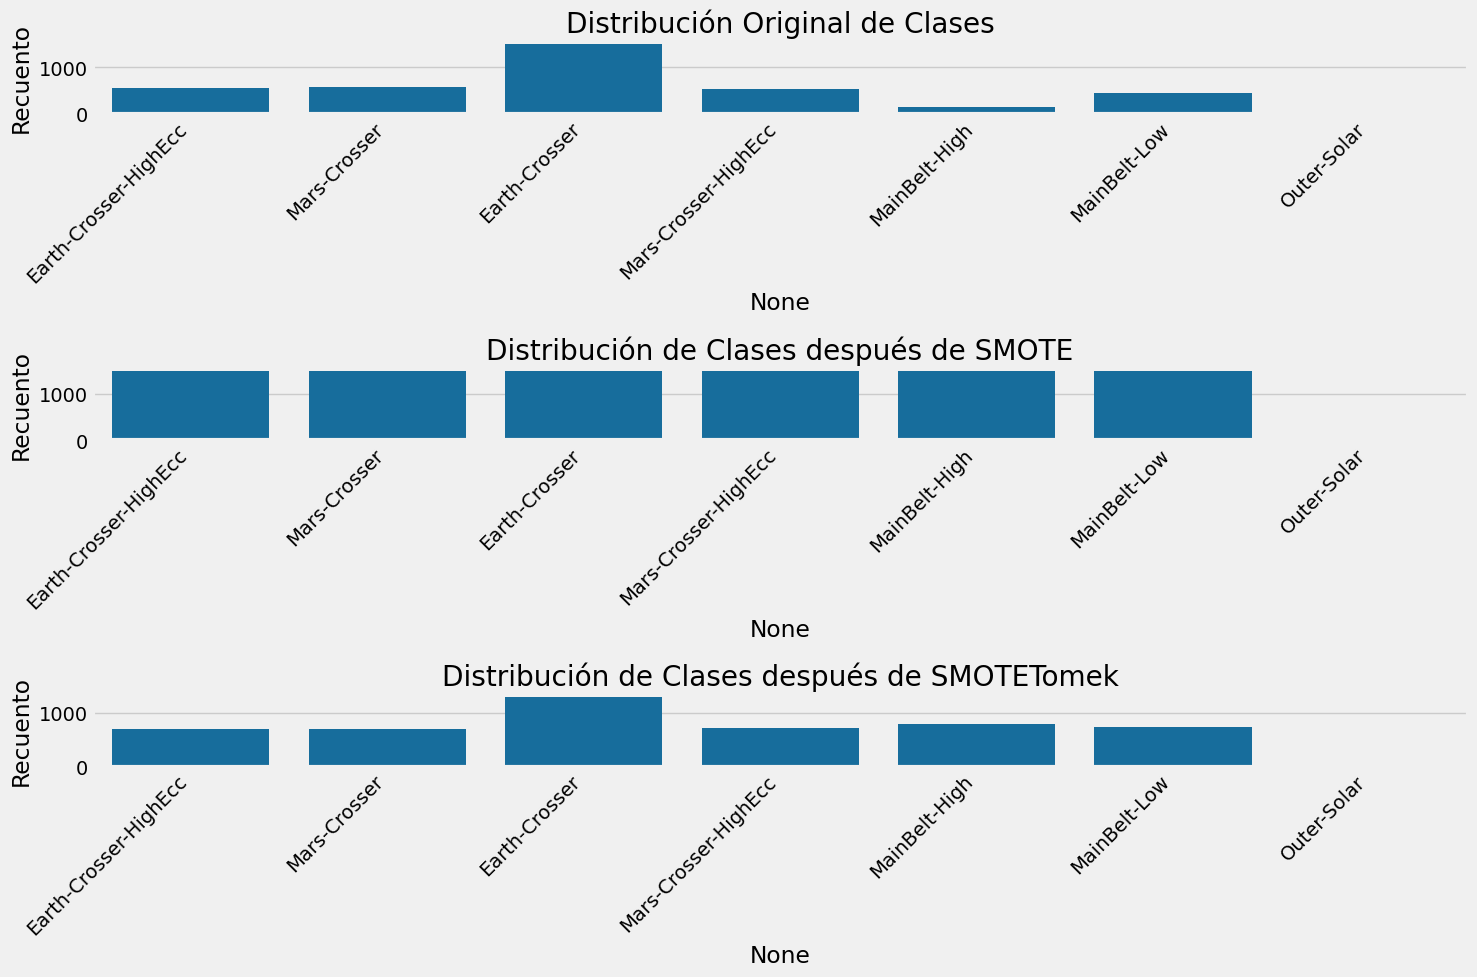


3. Enfoque especial para la clase Outer-Solar:
Distribución para clasificador binario: [('Other', 50), ('Outer-Solar', 5)]


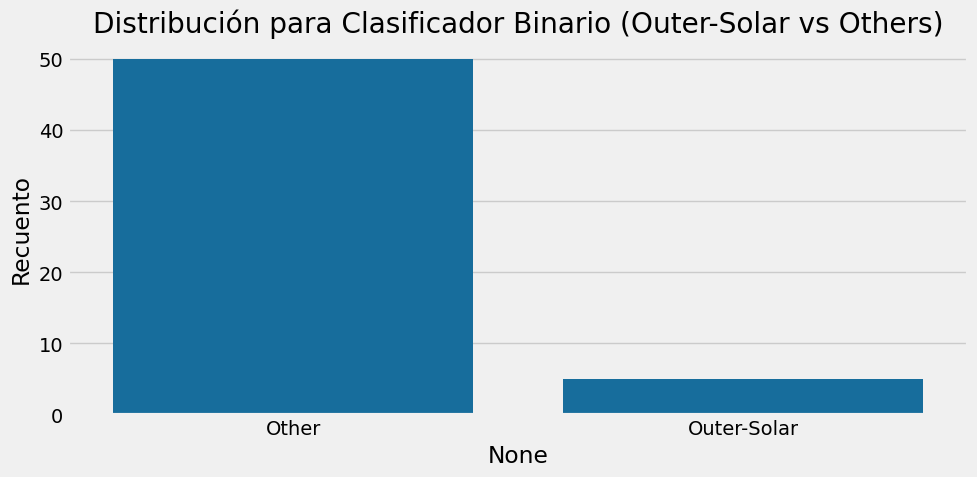


==== Balanceo de clases para RiskClass ====
Distribución original de clases: [('Low', 601), ('Moderate', 18), ('Negligible', 1086), ('Very Low', 2044)]
Distribución después de SMOTE: [('Low', 2044), ('Moderate', 2044), ('Negligible', 2044), ('Very Low', 2044)]


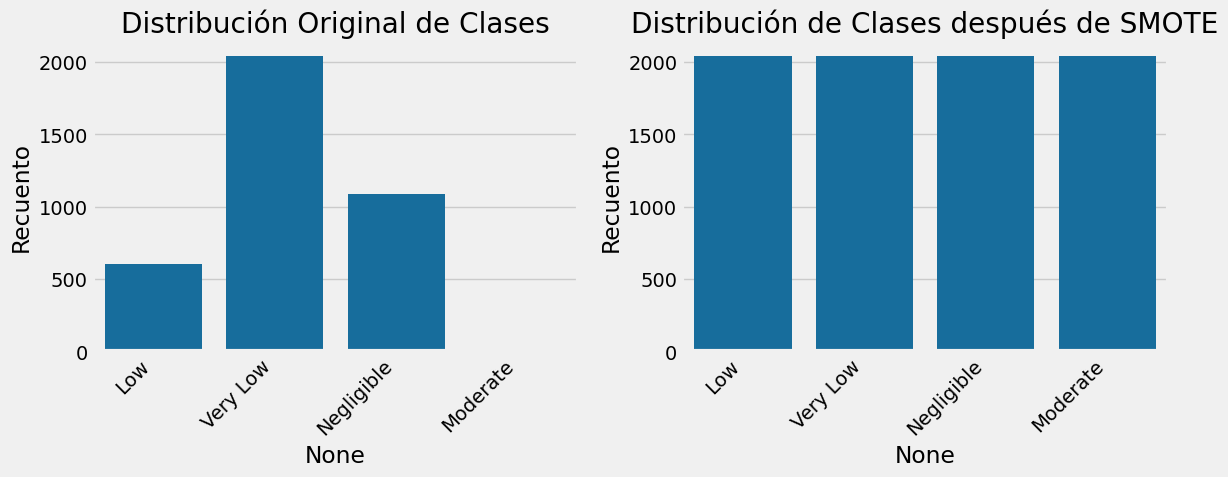


==== Balanceo de clases para ScientificPotential ====
Distribución original de clases: [('Common', 2154), ('Eccentric', 205), ('FastRotator', 1213), ('Metallic', 173), ('Peculiar', 4)]

Clases ultra-minoritarias detectadas: ['Peculiar']

1. Aplicando SMOTE excluyendo clases ultra-minoritarias:
Distribución después de SMOTE: [('Common', 2154), ('Eccentric', 2154), ('FastRotator', 2154), ('Metallic', 2154), ('Peculiar', 4)]

2. Enfoque de clasificación jerárquica para clases ultra-minoritarias:
Distribución para clasificador binario: [('No-Peculiar', 40), ('Peculiar', 4)]


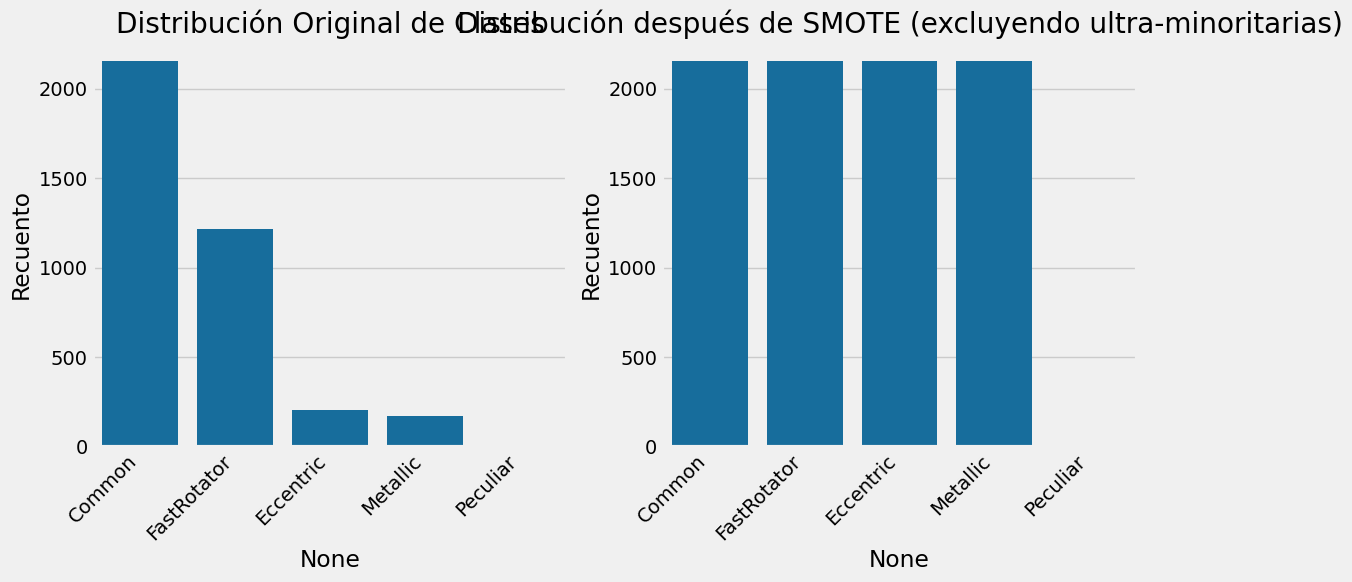

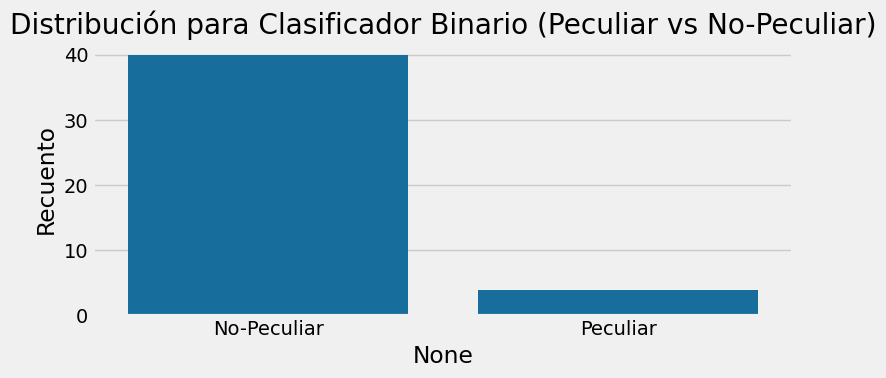

In [ ]:
# 3. Aplicar diferentes técnicas de resampling para cada variable objetivo

# 3.1 Para OrbitalType
if 'OrbitalType' in df.columns:
    y = df['OrbitalType']

    # Dividir los datos para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print("\n==== Balanceo de clases para OrbitalType ====")
    print(f"Distribución original de clases: {sorted(Counter(y_train).items())}")

    # Visualizar distribución original
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 1, 1)
    original_counts = pd.Series(Counter(y_train))
    sns.barplot(x=original_counts.index, y=original_counts.values)
    plt.title('Distribución Original de Clases')
    plt.ylabel('Recuento')
    plt.xticks(rotation=45, ha='right')

    # Técnica 1: SMOTE con estrategia personalizada (excluyendo la clase ultra-minoritaria)
    print("\n1. Aplicando SMOTE (excluyendo Outer-Solar):")
    sampling_strategy = {
        'Earth-Crosser': 1494,         # Mantener como está
        'Earth-Crosser-HighEcc': 1494, # Sobremuestrear para igualar clase mayor
        'MainBelt-High': 1494,         # Sobremuestrear para igualar clase mayor
        'MainBelt-Low': 1494,          # Sobremuestrear para igualar clase mayor
        'Mars-Crosser': 1494,          # Sobremuestrear para igualar clase mayor
        'Mars-Crosser-HighEcc': 1494   # Sobremuestrear para igualar clase mayor
        # Excluimos 'Outer-Solar' por tener muy pocas muestras
    }

    smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    print(f"Distribución después de SMOTE: {sorted(Counter(y_train_smote).items())}")
    print(f"Total de muestras: Original={len(y_train)}, Remuestreado={len(y_train_smote)}")

    # Visualizar después de SMOTE
    plt.subplot(3, 1, 2)
    smote_counts = pd.Series(Counter(y_train_smote))
    sns.barplot(x=smote_counts.index, y=smote_counts.values)
    plt.title('Distribución de Clases después de SMOTE')
    plt.ylabel('Recuento')
    plt.xticks(rotation=45, ha='right')

    # Técnica 2: SMOTETomek para un enfoque más balanceado
    print("\n2. Aplicando SMOTETomek con balance moderado:")

    # Obtenemos la distribución original
    original_distribution = Counter(y_train)

    # Definimos una estrategia que solo sobremuestrea las clases minoritarias
    target_counts = {}
    for class_name in original_distribution:
        if class_name == 'Earth-Crosser':
            # Mantener el número original para la clase mayoritaria
            target_counts[class_name] = original_distribution[class_name]
        elif class_name != 'Outer-Solar':  # Excluimos la clase ultra-minoritaria
            # Sobremuestrear clases minoritarias a un número razonable (por ejemplo, 800)
            target_counts[class_name] = 800

    print(f"Estrategia de muestreo para SMOTETomek: {target_counts}")

    smote_tomek = SMOTETomek(random_state=42, sampling_strategy=target_counts)
    X_train_tomek, y_train_tomek = smote_tomek.fit_resample(X_train, y_train)

    print(f"Distribución después de SMOTETomek: {sorted(Counter(y_train_tomek).items())}")
    print(f"Total de muestras: Original={len(y_train)}, Remuestreado={len(y_train_tomek)}")
    # Visualizar después de SMOTETomek
    plt.subplot(3, 1, 3)
    tomek_counts = pd.Series(Counter(y_train_tomek))
    sns.barplot(x=tomek_counts.index, y=tomek_counts.values)
    plt.title('Distribución de Clases después de SMOTETomek')
    plt.ylabel('Recuento')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    # Técnica 3: Enfoque para clase ultra-minoritaria (Outer-Solar)
    print("\n3. Enfoque especial para la clase Outer-Solar:")

    # Crear clasificador binario para Outer-Solar vs resto
    y_binary = y_train.apply(lambda x: 'Outer-Solar' if x == 'Outer-Solar' else 'Other')

    # Rebalancear este problema binario
    rus = RandomUnderSampler(sampling_strategy={
        'Outer-Solar': 5,   # Mantener todas las muestras
        'Other': 50         # Submuestrear mayoría a ratio razonable
    }, random_state=42)
    X_binary, y_binary = rus.fit_resample(X_train, y_binary)

    print(f"Distribución para clasificador binario: {sorted(Counter(y_binary).items())}")

    # Visualizar clasificador binario
    plt.figure(figsize=(10, 5))
    binary_counts = pd.Series(Counter(y_binary))
    sns.barplot(x=binary_counts.index, y=binary_counts.values)
    plt.title('Distribución para Clasificador Binario (Outer-Solar vs Others)')
    plt.ylabel('Recuento')
    plt.tight_layout()
    plt.show()

# 3.2 Para RiskClass (si está disponible en el dataset)
if 'RiskClass' in df.columns:
    y = df['RiskClass']

    # Dividir los datos para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print("\n==== Balanceo de clases para RiskClass ====")
    print(f"Distribución original de clases: {sorted(Counter(y_train).items())}")

    # Visualizar distribución original
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    original_counts = pd.Series(Counter(y_train))
    sns.barplot(x=original_counts.index, y=original_counts.values)
    plt.title('Distribución Original de Clases')
    plt.ylabel('Recuento')
    plt.xticks(rotation=45, ha='right')

    # Aplicar SMOTE para RiskClass
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    print(f"Distribución después de SMOTE: {sorted(Counter(y_train_smote).items())}")

    # Visualizar después de SMOTE
    plt.subplot(1, 2, 2)
    smote_counts = pd.Series(Counter(y_train_smote))
    sns.barplot(x=smote_counts.index, y=smote_counts.values)
    plt.title('Distribución de Clases después de SMOTE')
    plt.ylabel('Recuento')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

# 3.3 Para ScientificPotential (si está disponible en el dataset)
# Para ScientificPotential
if 'ScientificPotential' in df.columns:
    y = df['ScientificPotential']

    # Dividir los datos para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print("\n==== Balanceo de clases para ScientificPotential ====")
    print(f"Distribución original de clases: {sorted(Counter(y_train).items())}")

    # Visualizar distribución original
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    original_counts = pd.Series(Counter(y_train))
    sns.barplot(x=original_counts.index, y=original_counts.values)
    plt.title('Distribución Original de Clases')
    plt.ylabel('Recuento')
    plt.xticks(rotation=45, ha='right')

    # Identificar clases ultra-minoritarias (menos de 6 muestras)
    class_counts = Counter(y_train)
    ultra_minority_classes = [cls for cls, count in class_counts.items() if count < 6]

    if ultra_minority_classes:
        print(f"\nClases ultra-minoritarias detectadas: {ultra_minority_classes}")

        # Approach 1: Exclusión de clases ultra-minoritarias para SMOTE
        print("\n1. Aplicando SMOTE excluyendo clases ultra-minoritarias:")

        # Crear una estrategia de muestreo personalizada
        sampling_strategy = {}
        for cls, count in class_counts.items():
            if cls not in ultra_minority_classes:  # Excluir clases ultra-minoritarias
                sampling_strategy[cls] = max(class_counts.values())  # Igualar a la mayor clase

        # Aplicar SMOTE
        smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        print(f"Distribución después de SMOTE: {sorted(Counter(y_train_smote).items())}")

        # Visualizar después de SMOTE
        plt.subplot(1, 2, 2)
        smote_counts = pd.Series(Counter(y_train_smote))
        sns.barplot(x=smote_counts.index, y=smote_counts.values)
        plt.title('Distribución después de SMOTE (excluyendo ultra-minoritarias)')
        plt.ylabel('Recuento')
        plt.xticks(rotation=45, ha='right')

        # Approach 2: Enfoque de clasificación jerárquica para clases ultra-minoritarias
        print("\n2. Enfoque de clasificación jerárquica para clases ultra-minoritarias:")

        # Crear conjunto de datos para clasificación binaria
        y_binary = y_train.apply(lambda x: 'Peculiar' if x == 'Peculiar' else 'No-Peculiar')

        # Balancear este problema binario con submuestreo
        from imblearn.under_sampling import RandomUnderSampler

        rus = RandomUnderSampler(sampling_strategy={
            'Peculiar': class_counts['Peculiar'],  # Mantener todas las muestras
            'No-Peculiar': 40                      # Submuestrear a una cantidad razonable
        }, random_state=42)
        X_binary, y_binary = rus.fit_resample(X_train, y_binary)

        print(f"Distribución para clasificador binario: {sorted(Counter(y_binary).items())}")

        # Visualizar clasificador binario
        plt.figure(figsize=(8, 4))
        binary_counts = pd.Series(Counter(y_binary))
        sns.barplot(x=binary_counts.index, y=binary_counts.values)
        plt.title('Distribución para Clasificador Binario (Peculiar vs No-Peculiar)')
        plt.ylabel('Recuento')
        plt.tight_layout()

    else:
        # Si no hay clases ultra-minoritarias, aplicar SMOTE normal
        print("\nAplicando SMOTE estándar:")
        smote = SMOTE(random_state=42, k_neighbors=3)  # Reducir k_neighbors si es necesario
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        print(f"Distribución después de SMOTE: {sorted(Counter(y_train_smote).items())}")

        # Visualizar después de SMOTE
        plt.subplot(1, 2, 2)
        smote_counts = pd.Series(Counter(y_train_smote))
        sns.barplot(x=smote_counts.index, y=smote_counts.values)
        plt.title('Distribución después de SMOTE')
        plt.ylabel('Recuento')
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

Alternativamente, puedes intentar un enfoque más simple reduciendo el parámetro k_neighbors en SMOTE:

In [ ]:
# Solución rápida: Reducir k_neighbors
print("\nAplicando SMOTE con k_neighbors reducido:")
smote = SMOTE(random_state=42, k_neighbors=min(min(Counter(y_train).values())-1, 3))
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Distribución después de SMOTE: {sorted(Counter(y_train_smote).items())}")


Aplicando SMOTE con k_neighbors reducido:
Distribución después de SMOTE: [('Common', 2154), ('Eccentric', 2154), ('FastRotator', 2154), ('Metallic', 2154), ('Peculiar', 2154)]


# - 1. Hyperparameter Tuning (for extra credit)


*   Use optuna for hyperparameter tuning using a pruner or a heuristic.

*  Understand how Matthews Correlation Coefficient (MCC) can be used to measure the performance of the models and use it as an additional metric.  



In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 10.7 MB/s eta 0:00:00


In [ ]:

# Import libraries
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef, make_scorer

# Define objective function for optimization
def objective(trial, X, y):
    # Define parameter space for Random Forest
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 30, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Create model with suggested parameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Use MCC as scoring metric for cross-validation
    mcc_scorer = make_scorer(matthews_corrcoef)

    # Perform cross-validation
    score = cross_val_score(
        model, X, y,
        scoring=mcc_scorer,
        cv=5,
        n_jobs=-1
    ).mean()

    return score

# Run optimization for each difficulty level
best_params = {}

for level_name, df in levels.items():
    print(f"\nOptimizing Random Forest for {level_name}...")

    # Prepare data
    X = df.drop(columns=['OrbitalType', 'RiskClass', 'ScientificPotential', 'Hazardous',
                       'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date',
                       'Equinox'], errors='ignore')
    y = df['OrbitalType']

    # Create study and optimize
    study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())
    study.optimize(lambda trial: objective(trial, X, y), n_trials=50)

    # Store best parameters for this level
    best_params[level_name] = study.best_params

    # Print results
    print(f"Best parameters: {study.best_params}")
    print(f"Best MCC score: {study.best_value:.4f}")

    # Visualize parameter importance (if matplotlib is available)
    try:
        optuna.visualization.plot_param_importances(study)
    except:
        print("Could not create visualization. Continue...")

# Print summary of best parameters across levels
print("\nBest parameters summary:")
for level, params in best_params.items():
    print(f"{level}: {params}")

[I 2025-03-28 19:33:30,779] A new study created in memory with name: no-name-5dbb0f61-8c94-4f47-995c-c0f8969f7a60



Optimizing Random Forest for Level 1...


[I 2025-03-28 19:33:57,444] Trial 0 finished with value: 0.9952420137416276 and parameters: {'n_estimators': 164, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 0 with value: 0.9952420137416276.
[I 2025-03-28 19:34:29,291] Trial 1 finished with value: 0.996635505062099 and parameters: {'n_estimators': 283, 'max_depth': 17, 'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 1 with value: 0.996635505062099.
[I 2025-03-28 19:34:36,454] Trial 2 finished with value: 0.9466555204882457 and parameters: {'n_estimators': 80, 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 1 with value: 0.996635505062099.
[I 2025-03-28 19:34:44,407] Trial 3 finished with value: 0.9880164865286611 and parameters: {'n_estimators': 167, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.996635505062099.
[I 202

Best parameters: {'n_estimators': 240, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None}
Best MCC score: 0.9980


[I 2025-03-28 19:51:02,857] A new study created in memory with name: no-name-95782e70-8b9a-40f9-a1bb-b1534c92dcdc



Optimizing Random Forest for Level 2...


[I 2025-03-28 19:51:14,710] Trial 0 finished with value: 0.3473202455380545 and parameters: {'n_estimators': 298, 'max_depth': 6, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.3473202455380545.
[I 2025-03-28 19:51:22,130] Trial 1 finished with value: 0.22776999492472694 and parameters: {'n_estimators': 236, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.3473202455380545.
[I 2025-03-28 19:52:13,392] Trial 2 finished with value: 0.48238222433524436 and parameters: {'n_estimators': 200, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 2 with value: 0.48238222433524436.
[I 2025-03-28 19:53:02,554] Trial 3 finished with value: 0.4487328572692121 and parameters: {'n_estimators': 192, 'max_depth': 10, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 2 with value: 0.482382224335244

Best parameters: {'n_estimators': 248, 'max_depth': 21, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': None}
Best MCC score: 0.5025


[I 2025-03-28 20:14:47,361] A new study created in memory with name: no-name-15024cca-48f0-43e4-8de8-007ecfdb4e63



Optimizing Random Forest for Level 3...


[I 2025-03-28 20:15:04,549] Trial 0 finished with value: 0.2222704537703568 and parameters: {'n_estimators': 276, 'max_depth': 14, 'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 0.2222704537703568.
[I 2025-03-28 20:15:22,432] Trial 1 finished with value: 0.15251754067737036 and parameters: {'n_estimators': 261, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 0 with value: 0.2222704537703568.
[I 2025-03-28 20:15:26,752] Trial 2 finished with value: 0.1939798802576611 and parameters: {'n_estimators': 161, 'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.2222704537703568.
[I 2025-03-28 20:15:37,833] Trial 3 finished with value: 0.18524098818923923 and parameters: {'n_estimators': 295, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.22227045377035

Best parameters: {'n_estimators': 270, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': None}
Best MCC score: 0.2522


[I 2025-03-28 20:43:01,572] A new study created in memory with name: no-name-891c4866-19db-4960-814e-f9ae485a8842



Optimizing Random Forest for Level 4...


[I 2025-03-28 20:43:13,192] Trial 0 finished with value: 0.011473421104587711 and parameters: {'n_estimators': 103, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 0 with value: 0.011473421104587711.
[I 2025-03-28 20:43:17,299] Trial 1 finished with value: 0.07152419808219378 and parameters: {'n_estimators': 95, 'max_depth': 29, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 1 with value: 0.07152419808219378.
[I 2025-03-28 20:43:21,377] Trial 2 finished with value: 0.0535689013605124 and parameters: {'n_estimators': 184, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.07152419808219378.
[I 2025-03-28 20:43:30,100] Trial 3 finished with value: 0.05913702420085787 and parameters: {'n_estimators': 165, 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 1 with value: 0.0715241980

Best parameters: {'n_estimators': 77, 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}
Best MCC score: 0.0871

Best parameters summary:
Level 1: {'n_estimators': 240, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None}
Level 2: {'n_estimators': 248, 'max_depth': 21, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': None}
Level 3: {'n_estimators': 270, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': None}
Level 4: {'n_estimators': 77, 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}


Análisis de los Resultados de Optimización de Hiperparámetros
Nivel 1 (26 características - nivel base)

- Mejores parámetros:

  - n_estimators: 240 (número de árboles)
  - max_depth: 11 (profundidad máxima de cada árbol)
  - min_samples_split: 4 (mínimo de muestras para dividir un nodo)
  - min_samples_leaf: 1 (mínimo de muestras en una hoja)
  - max_features: None (usar todas las características disponibles)


- Mejor puntuación MCC: 0.9980 (extremadamente alta)

- Observación: En este nivel, con todas las características importantes disponibles, el modelo puede lograr un rendimiento casi perfecto. Los parámetros óptimos muestran una preferencia por un conjunto grande de árboles relativamente profundos que pueden usar todas las características disponibles.

Nivel 2 (21 características - sin las 5 más importantes)

- Mejores parámetros:

  - n_estimators: 248 (similar al nivel 1)
  - max_depth: 21 (casi el doble de profundidad que en el nivel 1)
  - min_samples_split: 5 (ligeramente más restrictivo)
  - min_samples_leaf: 5 (mucho más restrictivo que en el nivel 1)
  - max_features: None (igual que en nivel 1)


- Mejor puntuación MCC: 0.5025 (una caída significativa)
- Observación: Al eliminar las 5 características más importantes, el rendimiento cae drásticamente (de 0.998 a 0.5025). Para compensar, el modelo óptimo utiliza árboles mucho más profundos y exige más muestras por hoja para evitar el sobreajuste.

Nivel 3 (16 características - sin las 10 más importantes)

- Mejores parámetros:

  - n_estimators: 270 (más árboles que en niveles anteriores)
  - max_depth: 15 (menos profundo que en nivel 2 pero más que en nivel 1)
  - min_samples_split: 3 (menos restrictivo que en nivel 2)
  - min_samples_leaf: 2 (menos restrictivo que en nivel 2)
  - max_features: None (consistente con niveles anteriores)


- Mejor puntuación MCC: 0.2522 (reducción adicional significativa)
- Observación: Con solo 16 características, perdiendo las 10 más importantes, el rendimiento sigue deteriorándose. El modelo intenta compensar usando más árboles, pero la profundidad óptima es menor que en el nivel 2, posiblemente para evitar sobreajustarse a datos con menos información predictiva.

Nivel 4 (10 características - solo las menos importantes)

- Mejores parámetros:

  - n_estimators: 77 (muchos menos árboles)
  - max_depth: 10 (menos profundo)
  - min_samples_split: 12 (mucho más restrictivo)
  - min_samples_leaf: 9 (extremadamente restrictivo)
  - max_features: 'log2' (limita las características por árbol)


- Mejor puntuación MCC: 0.0871 (extremadamente baja)
- Observación: Con solo las 10 características menos importantes, el rendimiento colapsa. El modelo óptimo cambia drásticamente: utiliza muchos menos árboles, limita las características por árbol (log2) y aplica restricciones mucho más severas en splits y hojas para evitar el sobreajuste.

Tendencias Generales:

- Número de árboles (n_estimators): Aumenta en los niveles 1-3 (240 → 248 → 270) pero cae drásticamente en el nivel 4 (77), sugiriendo que con características débiles, más árboles no ayudan y pueden incluso perjudicar.
- Profundidad (max_depth): Aumenta significativamente del nivel 1 al 2 (11 → 21) pero luego disminuye gradualmente (21 → 15 → 10), indicando que árboles más profundos son útiles cuando faltan algunas características importantes, pero no cuando la información predictiva es mínima.
- Restricciones de muestra: A medida que disminuye la calidad de las características, aumentan los valores de min_samples_split y min_samples_leaf, confirmando que se necesita más regularización para evitar el sobreajuste con características débiles.
- Selección de características (max_features): Permanece como None (todas las características) hasta el nivel 4, donde cambia a 'log2', lo que indica que con características muy débiles, es mejor limitar cuántas considera cada árbol.

# -  Código para generar la matriz de confusión del mejor modelo optimizado

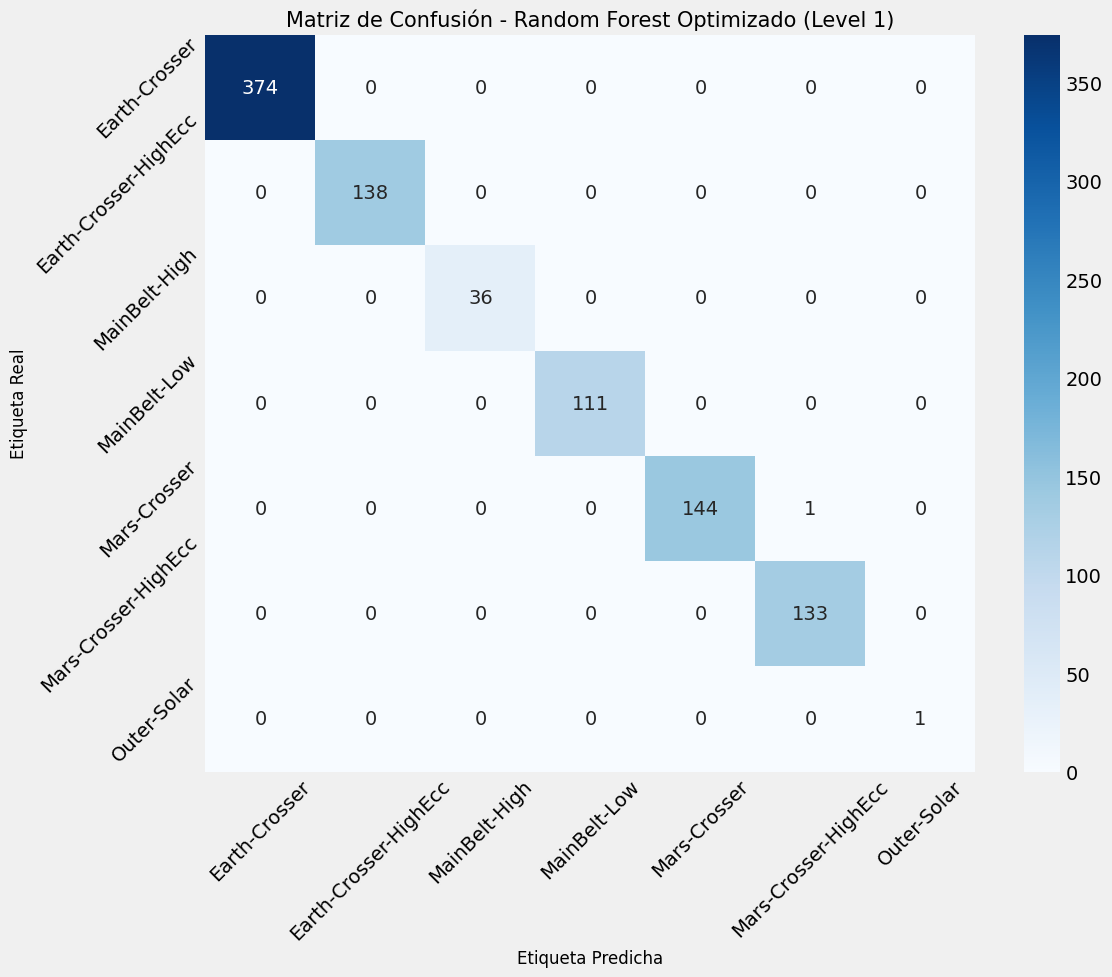

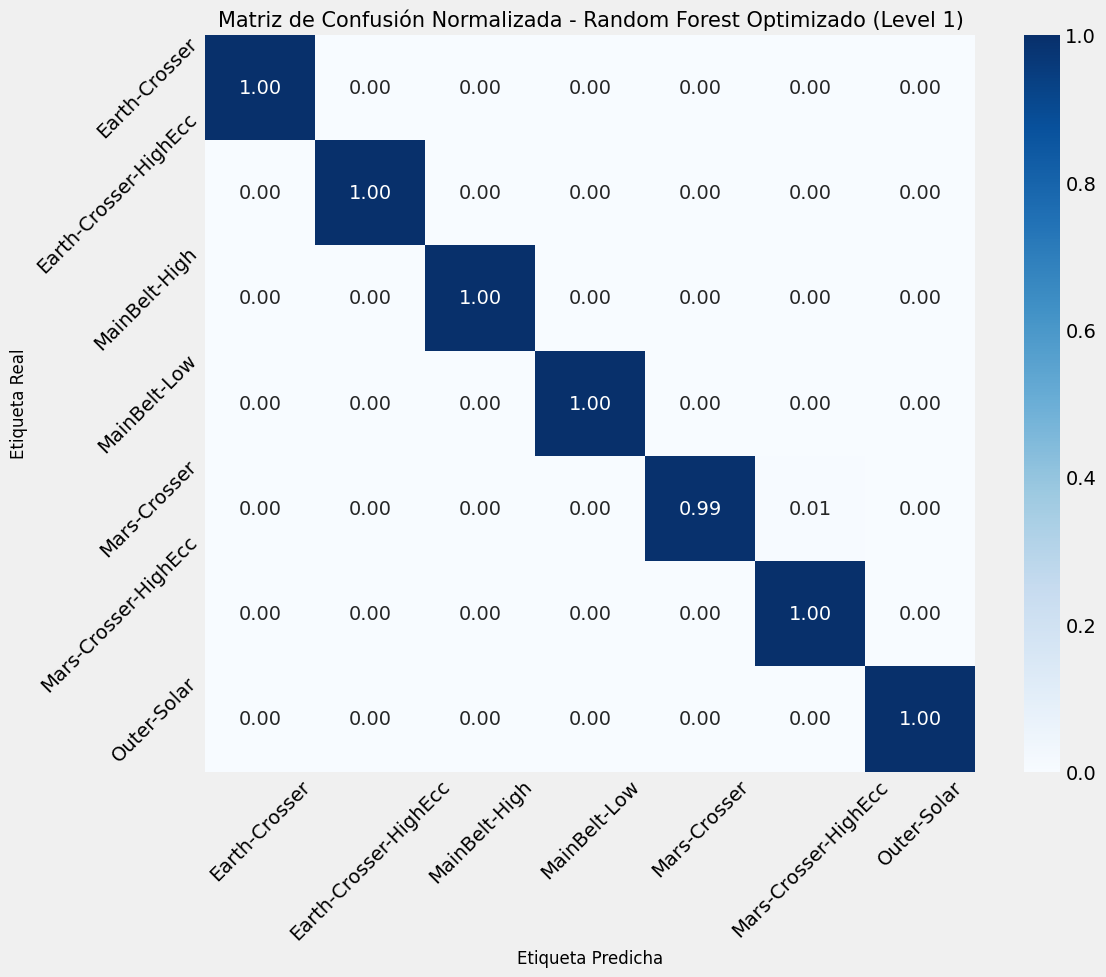


Informe de Clasificación para Random Forest Optimizado:
                       precision    recall  f1-score   support

        Earth-Crosser       1.00      1.00      1.00       374
Earth-Crosser-HighEcc       1.00      1.00      1.00       138
        MainBelt-High       1.00      1.00      1.00        36
         MainBelt-Low       1.00      1.00      1.00       111
         Mars-Crosser       1.00      0.99      1.00       145
 Mars-Crosser-HighEcc       0.99      1.00      1.00       133
          Outer-Solar       1.00      1.00      1.00         1

             accuracy                           1.00       938
            macro avg       1.00      1.00      1.00       938
         weighted avg       1.00      1.00      1.00       938


Análisis de la clase ultra-minoritaria 'Outer-Solar':
Número total de muestras 'Outer-Solar' en el conjunto de prueba: 1
Correctamente clasificados: 1
Precisión: 1.0000
Recall: 1.0000

'Outer-Solar' no se confunde con ninguna otra clase.


In [ ]:
# Implementar y evaluar el mejor modelo optimizado (Random Forest) para el nivel 1
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset del nivel 1
df_level1 = pd.read_csv('nasa_asteroids_level1_difficulty.csv')

# Preparar los datos
X = df_level1.drop(columns=['OrbitalType', 'RiskClass', 'ScientificPotential', 'Hazardous',
                     'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date',
                     'Equinox'], errors='ignore')
y = df_level1['OrbitalType']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Crear el modelo con los mejores parámetros encontrados con Optuna
best_rf_model = RandomForestClassifier(
    n_estimators=240,
    max_depth=11,
    min_samples_split=4,
    min_samples_leaf=1,
    max_features=None,
    random_state=42
)

# Entrenar el modelo
best_rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = best_rf_model.predict(X_test)

# Obtener clases únicas en orden para la matriz de confusión
class_names = sorted(y.unique())

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=class_names)

# Calcular la matriz de confusión normalizada (por filas)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Visualizar la matriz de confusión
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión - Random Forest Optimizado (Level 1)', fontsize=15)
plt.ylabel('Etiqueta Real', fontsize=12)
plt.xlabel('Etiqueta Predicha', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.savefig('confusion_matrix_optimized_rf.png')
plt.show()

# Visualizar la matriz de confusión normalizada
plt.figure(figsize=(12, 10))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión Normalizada - Random Forest Optimizado (Level 1)', fontsize=15)
plt.ylabel('Etiqueta Real', fontsize=12)
plt.xlabel('Etiqueta Predicha', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.savefig('confusion_matrix_normalized_optimized_rf.png')
plt.show()

# Imprimir el informe de clasificación
print("\nInforme de Clasificación para Random Forest Optimizado:")
print(classification_report(y_test, y_pred))

# Analizar específicamente la clase Outer-Solar
outer_solar_idx = list(class_names).index('Outer-Solar')
if outer_solar_idx in range(len(class_names)):
    # Precisión para Outer-Solar
    outer_solar_precision = cm[outer_solar_idx, outer_solar_idx] / cm[:, outer_solar_idx].sum() if cm[:, outer_solar_idx].sum() > 0 else 0
    # Recall para Outer-Solar
    outer_solar_recall = cm[outer_solar_idx, outer_solar_idx] / cm[outer_solar_idx, :].sum() if cm[outer_solar_idx, :].sum() > 0 else 0

    print("\nAnálisis de la clase ultra-minoritaria 'Outer-Solar':")
    print(f"Número total de muestras 'Outer-Solar' en el conjunto de prueba: {cm[outer_solar_idx, :].sum()}")
    print(f"Correctamente clasificados: {cm[outer_solar_idx, outer_solar_idx]}")
    print(f"Precisión: {outer_solar_precision:.4f}")
    print(f"Recall: {outer_solar_recall:.4f}")

    # Mostrar con qué clases se confunde Outer-Solar
    if cm[outer_solar_idx, :].sum() > 0:
        confused_with = [(class_names[i], cm[outer_solar_idx, i])
                         for i in range(len(class_names))
                         if i != outer_solar_idx and cm[outer_solar_idx, i] > 0]

        if confused_with:
            print("\n'Outer-Solar' se confunde principalmente con:")
            for class_name, count in confused_with:
                print(f"- {class_name}: {count} muestras ({count/cm[outer_solar_idx, :].sum()*100:.2f}%)")
        else:
            print("\n'Outer-Solar' no se confunde con ninguna otra clase.")

# - Código para optimizar Gradient Boosting (segundo modelo)

In [ ]:
# Optimización de hiperparámetros para Gradient Boosting usando Optuna
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef, make_scorer

# Definir función objetivo para optimización de Gradient Boosting
def objective_gb(trial, X, y):
    # Definir espacio de parámetros para Gradient Boosting
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)

    # Crear modelo con los parámetros sugeridos
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        random_state=42
    )

    # Utilizar MCC como métrica para validación cruzada
    mcc_scorer = make_scorer(matthews_corrcoef)

    # Realizar validación cruzada
    score = cross_val_score(
        model, X, y,
        scoring=mcc_scorer,
        cv=5,
        n_jobs=-1
    ).mean()

    return score

# Optimizar Gradient Boosting para cada nivel de dificultad
best_gb_params = {}

for level_name, df in levels.items():
    print(f"\nOptimizando Gradient Boosting para {level_name}...")

    # Preparar datos
    X = df.drop(columns=['OrbitalType', 'RiskClass', 'ScientificPotential', 'Hazardous',
                       'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date',
                       'Equinox'], errors='ignore')
    y = df['OrbitalType']

    # Crear estudio y optimizar
    study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())
    study.optimize(lambda trial: objective_gb(trial, X, y), n_trials=30)  # Reducido a 30 trials para ahorrar tiempo

    # Guardar mejores parámetros para este nivel
    best_gb_params[level_name] = study.best_params

    # Imprimir resultados
    print(f"Mejores parámetros: {study.best_params}")
    print(f"Mejor puntuación MCC: {study.best_value:.4f}")

# Imprimir resumen de mejores parámetros
print("\nResumen de mejores parámetros para Gradient Boosting:")
for level, params in best_gb_params.items():
    print(f"{level}: {params}")

# Comparar rendimiento de Random Forest y Gradient Boosting optimizados
print("\nComparativa de modelos optimizados:")

comparison_results = []

for level_name, df in levels.items():
    print(f"\nEvaluando modelos optimizados en {level_name}...")

    # Preparar datos
    X = df.drop(columns=['OrbitalType', 'RiskClass', 'ScientificPotential', 'Hazardous',
                       'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date',
                       'Equinox'], errors='ignore')
    y = df['OrbitalType']

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Random Forest optimizado
    rf_params = best_params[level_name]  # Usar los parámetros que encontraste antes
    rf_model = RandomForestClassifier(**rf_params, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_mcc = matthews_corrcoef(y_test, rf_pred)

    # Gradient Boosting optimizado
    gb_params = best_gb_params[level_name]
    gb_model = GradientBoostingClassifier(**gb_params, random_state=42)
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_test)
    gb_accuracy = accuracy_score(y_test, gb_pred)
    gb_mcc = matthews_corrcoef(y_test, gb_pred)

    # Guardar resultados
    comparison_results.append({
        'Level': level_name,
        'Model': 'Random Forest (optimizado)',
        'Accuracy': rf_accuracy,
        'MCC': rf_mcc
    })
    comparison_results.append({
        'Level': level_name,
        'Model': 'Gradient Boosting (optimizado)',
        'Accuracy': gb_accuracy,
        'MCC': gb_mcc
    })

    print(f"Random Forest: Accuracy={rf_accuracy:.4f}, MCC={rf_mcc:.4f}")
    print(f"Gradient Boosting: Accuracy={gb_accuracy:.4f}, MCC={gb_mcc:.4f}")

# Convertir resultados a DataFrame
comparison_df = pd.DataFrame(comparison_results)

# Visualizar comparación
plt.figure(figsize=(14, 8))
sns.barplot(x='Level', y='Accuracy', hue='Model', data=comparison_df)
plt.title('Comparación de Modelos Optimizados por Nivel de Dificultad', fontsize=16)
plt.xlabel('Nivel de Dificultad', fontsize=14)
plt.ylabel('Precisión', fontsize=14)
plt.ylim(0, 1)
plt.legend(title='Modelo')
plt.tight_layout()
plt.savefig('optimized_models_comparison.png')
plt.show()

[I 2025-03-28 21:14:24,709] A new study created in memory with name: no-name-13b7cb64-9a53-46fa-83a8-248d73ab8b3d



Optimizando Gradient Boosting para Level 1...


[I 2025-03-28 21:17:25,579] Trial 0 finished with value: 0.6653189111130627 and parameters: {'n_estimators': 85, 'learning_rate': 0.24166278561160004, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 9, 'subsample': 0.62071568484937}. Best is trial 0 with value: 0.6653189111130627.
[I 2025-03-28 21:19:43,717] Trial 1 finished with value: 0.9946739482820689 and parameters: {'n_estimators': 59, 'learning_rate': 0.11689007392827522, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 8, 'subsample': 0.76744156184709}. Best is trial 1 with value: 0.9946739482820689.
[I 2025-03-28 21:22:42,960] Trial 2 finished with value: 0.9957992916068188 and parameters: {'n_estimators': 77, 'learning_rate': 0.08025549460101125, 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 5, 'subsample': 0.7567194228892602}. Best is trial 2 with value: 0.9957992916068188.
[I 2025-03-28 21:24:41,911] Trial 3 finished with value: 0.9971955888204416 and parameters: {'n_estimators': 71, '